In [23]:
# Import relevant libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

In [25]:
url='https://raw.githubusercontent.com/gamzebb/group-project/refs/heads/main/finbert_sentiment.csv'
finbert_sentiment = pd.read_csv(url)

In [19]:
finbert_sentiment.head()

polarity_score_finbert        Date
0               -0.062779  1998-09-15
1                0.464896  1998-10-21
2               -0.146942  1998-10-21
3                0.014382  1998-11-01
4                0.014361  1998-11-01

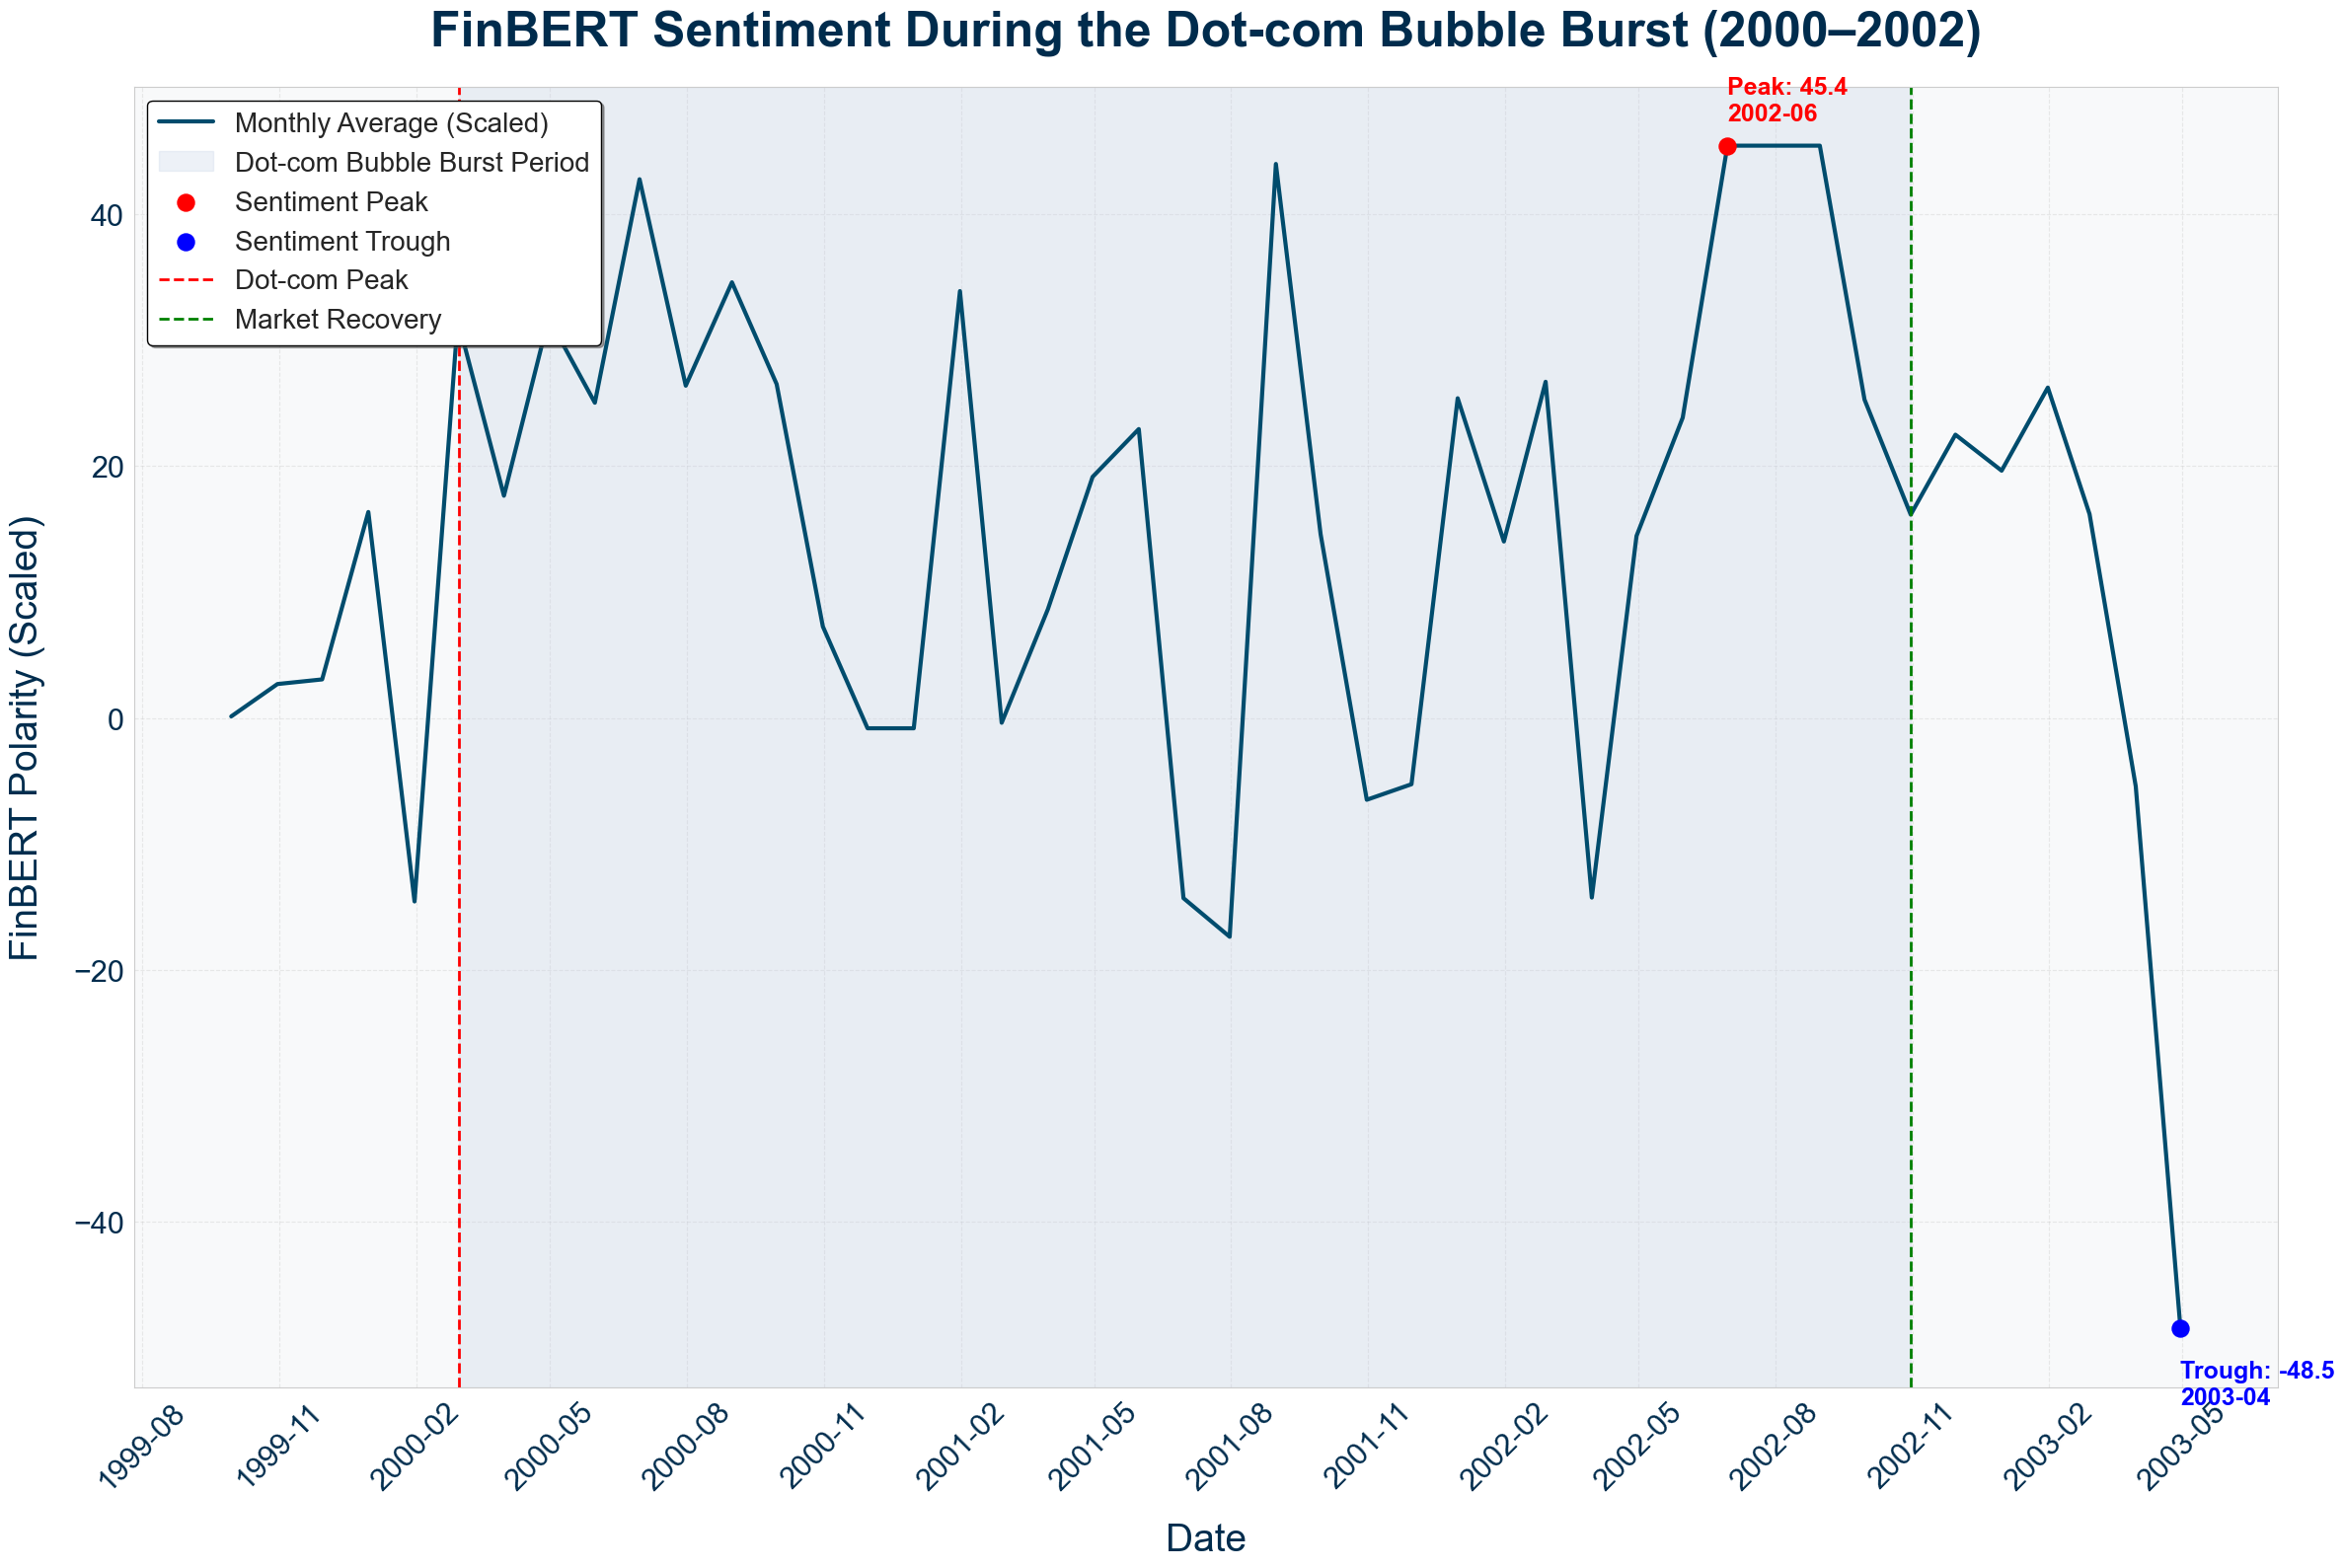

In [40]:
# Ensure 'Date' is in datetime format
finbert_sentiment = finbert_sentiment.copy()
finbert_sentiment['Date'] = pd.to_datetime(finbert_sentiment['Date'])

# Define the Dot-com Bubble Burst period
event_name = "Dot-com Bubble Burst"
start_date = pd.to_datetime("2000-03-01") - pd.DateOffset(months=6)
end_date = pd.to_datetime("2002-10-31") + pd.DateOffset(months=6)

# Filter data for this specific event
event_data = finbert_sentiment[(finbert_sentiment['Date'] >= start_date) & (finbert_sentiment['Date'] <= end_date)]

# Resample to monthly average
monthly_event_data = event_data.set_index('Date').resample('ME').mean().reset_index()

# Fill missing values and scale
monthly_event_data['polarity_score_finbert'] = monthly_event_data['polarity_score_finbert'].ffill()
monthly_event_data['polarity_scaled'] = monthly_event_data['polarity_score_finbert'] * 100

# Find peak and trough during the event period
peak_idx = monthly_event_data['polarity_scaled'].idxmax()
trough_idx = monthly_event_data['polarity_scaled'].idxmin()

peak_date = monthly_event_data.loc[peak_idx, 'Date']
peak_value = monthly_event_data.loc[peak_idx, 'polarity_scaled']
trough_date = monthly_event_data.loc[trough_idx, 'Date']
trough_value = monthly_event_data.loc[trough_idx, 'polarity_scaled']

# Start plotting
plt.figure(figsize=(24, 16))
sns.set_style("whitegrid")

# Plot sentiment trend
plt.plot(monthly_event_data['Date'], monthly_event_data['polarity_scaled'],
         color='#004c6d', linewidth=3, label='Monthly Average (Scaled)')

# Highlight event period
plt.axvspan(pd.to_datetime("2000-03-01"), pd.to_datetime("2002-10-31"),
            color='#c6d2e6', alpha=0.3, label=f"{event_name} Period")

# Mark peak and trough
plt.scatter([peak_date], [peak_value], color='red', s=150, zorder=5, label='Sentiment Peak')
plt.scatter([trough_date], [trough_value], color='blue', s=150, zorder=5, label='Sentiment Trough')

# Annotate them
plt.text(peak_date, peak_value + 2, f'Peak: {peak_value:.1f}\n{peak_date:%Y-%m}',
         color='red', fontsize=18, weight='bold')
plt.text(trough_date, trough_value - 6, f'Trough: {trough_value:.1f}\n{trough_date:%Y-%m}',
         color='blue', fontsize=18, weight='bold')

# Vertical markers for known economic turning points
plt.axvline(pd.to_datetime("2000-03-01"), color='red', linestyle='--', linewidth=2, label="Dot-com Peak")
plt.axvline(pd.to_datetime("2002-10-31"), color='green', linestyle='--', linewidth=2, label="Market Recovery")

# Title and axes
plt.title(f"FinBERT Sentiment During the {event_name} (2000–2002)", fontsize=36, pad=30, weight='bold', color='#002c4d')
plt.xlabel("Date", fontsize=28, labelpad=20, color='#002c4d')
plt.ylabel("FinBERT Polarity (Scaled)", fontsize=28, labelpad=20, color='#002c4d')

# Formatting
plt.xticks(rotation=45, fontsize=22, color='#002c4d')
plt.yticks(fontsize=22, color='#002c4d')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.grid(True, linestyle='--', alpha=0.4)
plt.gca().set_facecolor('#f8f9fa')

# Legend
plt.legend(loc='upper left', fontsize=20, frameon=True, shadow=True, facecolor='white', edgecolor='black', fancybox=True)

# Save and show
plt.tight_layout()
#plt.savefig("dotcom_bubble_sentiment_annotated.png", dpi=300, bbox_inches="tight")
plt.show()

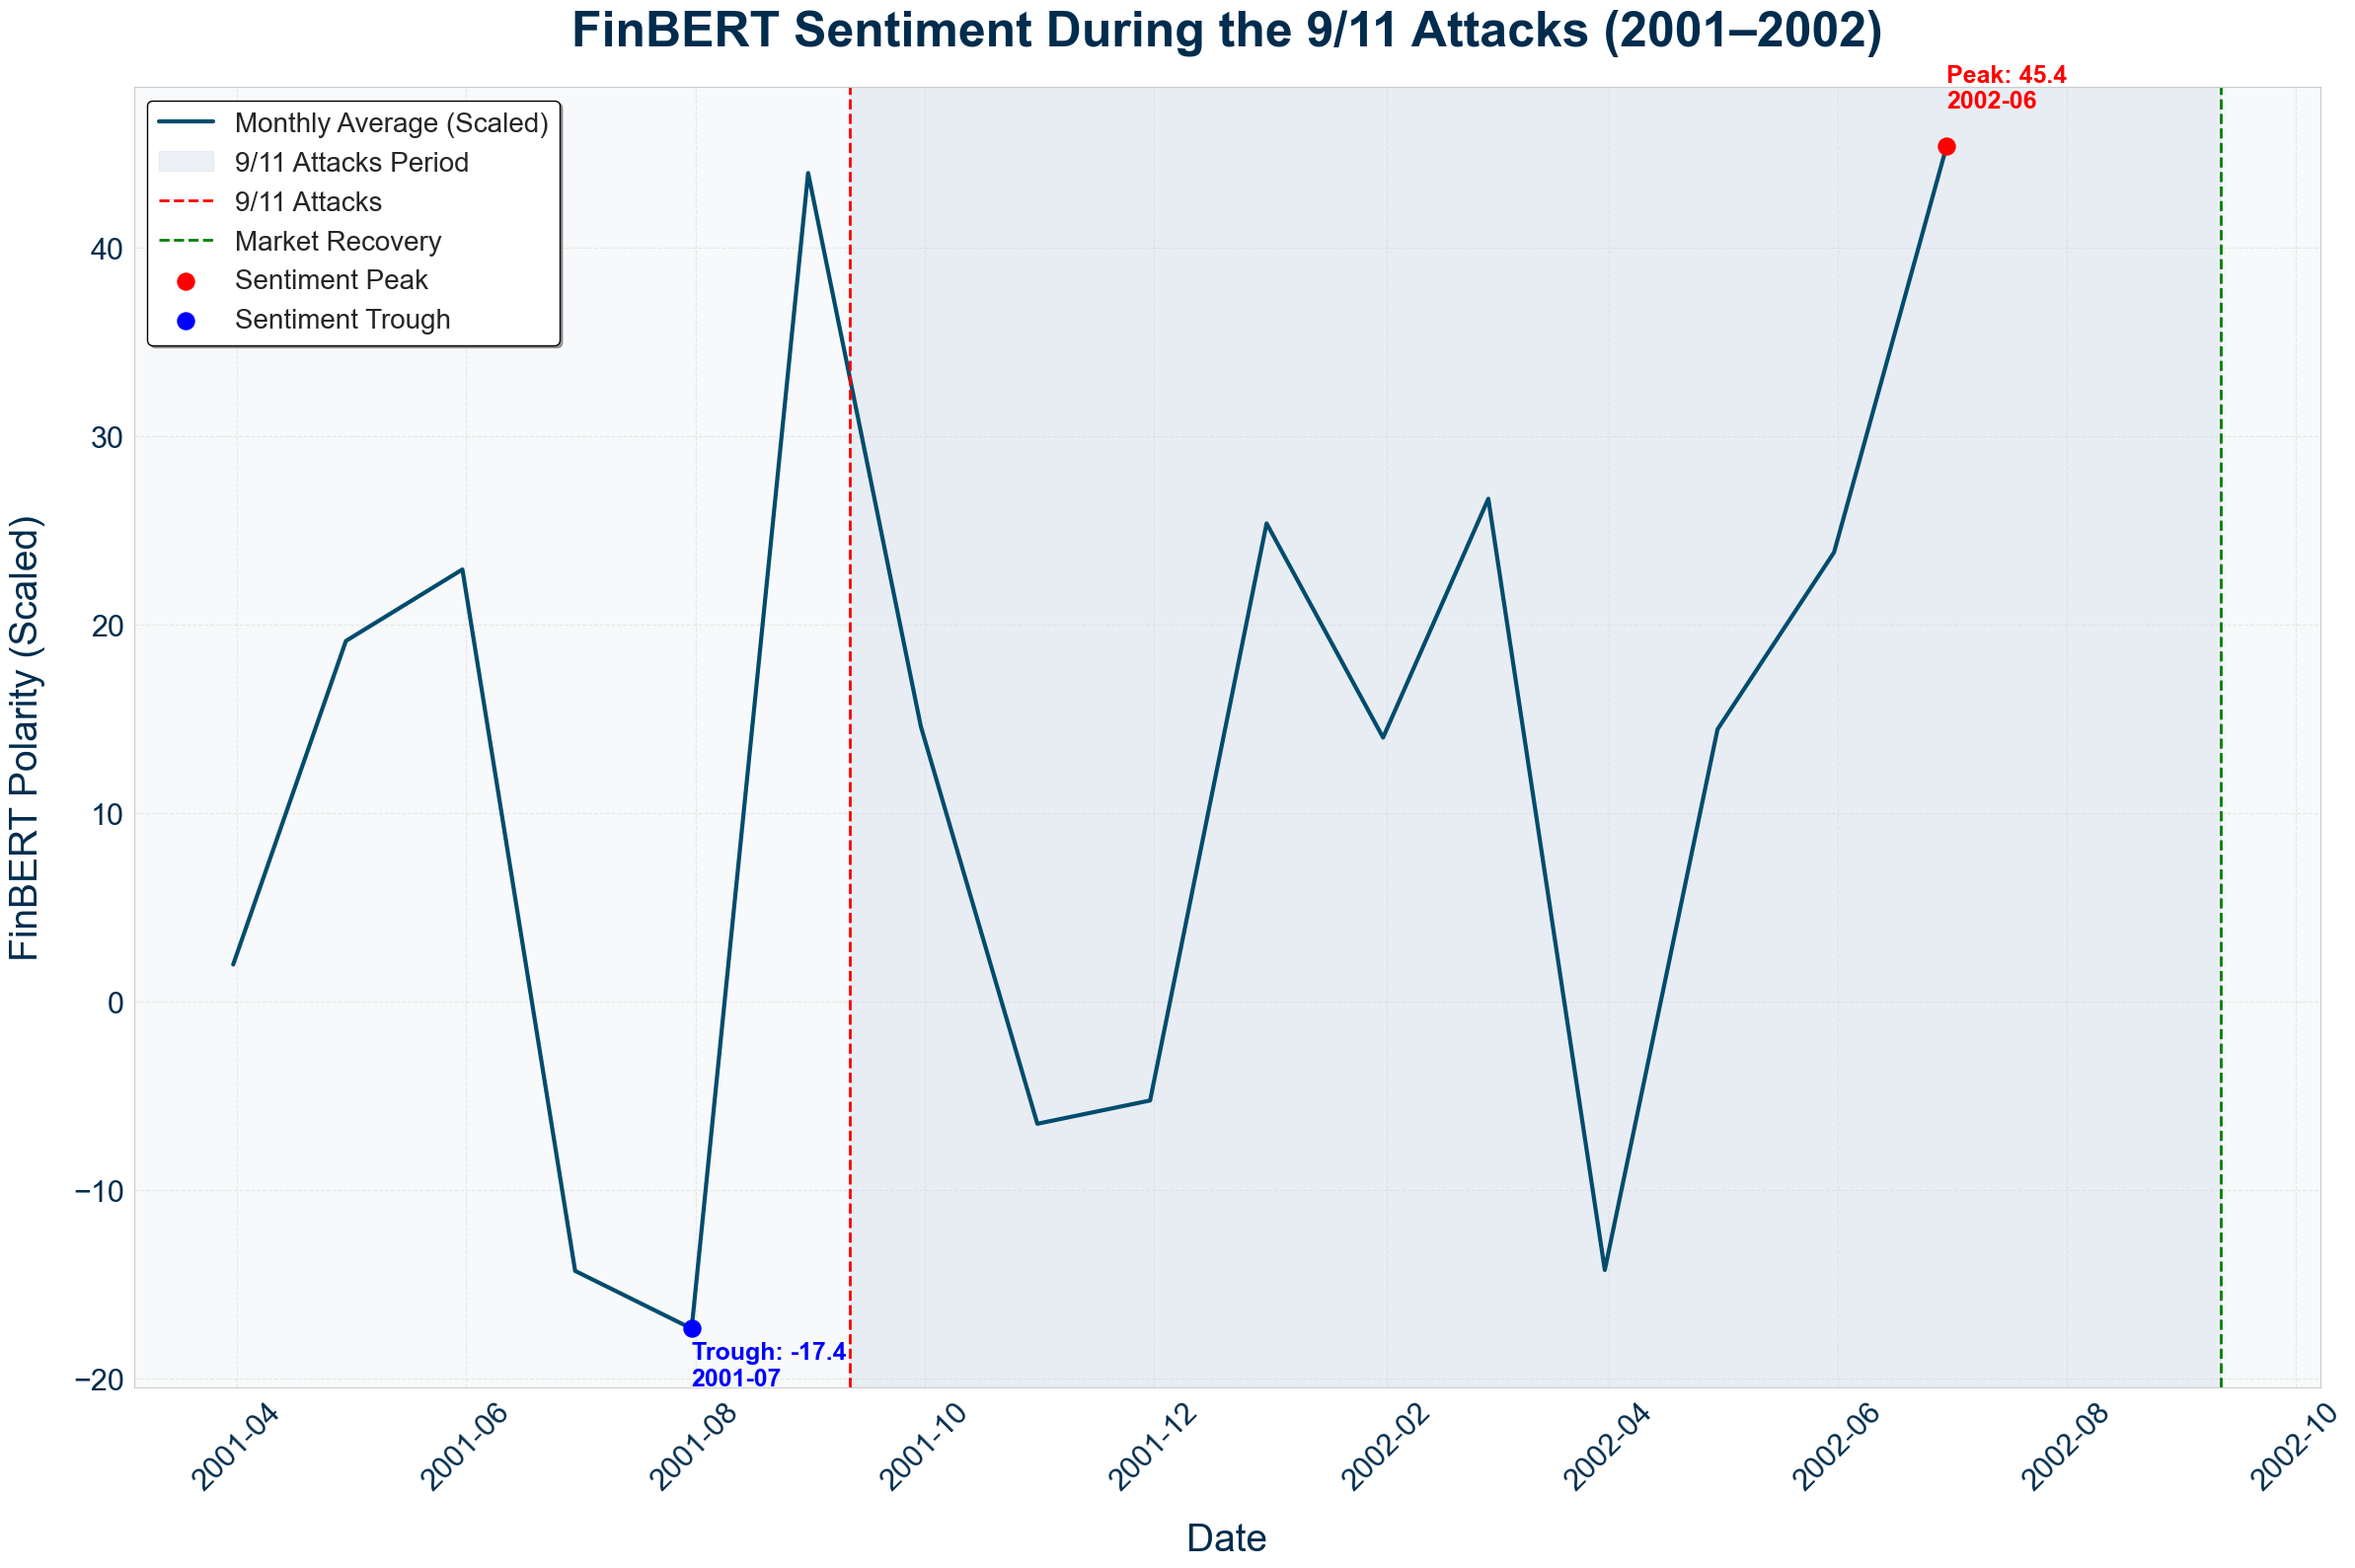

In [46]:
# Make a copy and convert 'Date' column
finbert_sentiment = finbert_sentiment.copy()
finbert_sentiment['Date'] = pd.to_datetime(finbert_sentiment['Date'])

# Define the 9/11 event period
event_name = "9/11 Attacks"
start_date = pd.to_datetime("2001-09-11") - pd.DateOffset(months=6)
end_date = pd.to_datetime("2001-09-11") + pd.DateOffset(months=12)

# Filter and resample to monthly average
event_data = finbert_sentiment[(finbert_sentiment['Date'] >= start_date) & (finbert_sentiment['Date'] <= end_date)]
monthly_event_data = event_data.set_index('Date').resample('ME').mean().reset_index()

# Fill and scale
monthly_event_data['polarity_score_finbert'] = monthly_event_data['polarity_score_finbert'].ffill()
monthly_event_data['polarity_scaled'] = monthly_event_data['polarity_score_finbert'] * 100

# Find peak and trough
peak_idx = monthly_event_data['polarity_scaled'].idxmax()
trough_idx = monthly_event_data['polarity_scaled'].idxmin()
peak_date = monthly_event_data.loc[peak_idx, 'Date']
peak_value = monthly_event_data.loc[peak_idx, 'polarity_scaled']
trough_date = monthly_event_data.loc[trough_idx, 'Date']
trough_value = monthly_event_data.loc[trough_idx, 'polarity_scaled']

# Plot
plt.figure(figsize=(24, 16))
sns.set_style("whitegrid")

plt.plot(monthly_event_data['Date'], monthly_event_data['polarity_scaled'], color='#004c6d', linewidth=3, label='Monthly Average (Scaled)')

# Highlight event period
plt.axvspan(pd.to_datetime("2001-09-11"), pd.to_datetime("2002-09-11"), color='#c6d2e6', alpha=0.3, label=f"{event_name} Period")

# Vertical markers
plt.axvline(pd.to_datetime("2001-09-11"), color='red', linestyle='--', linewidth=2, label="9/11 Attacks")
plt.axvline(pd.to_datetime("2002-09-11"), color='green', linestyle='--', linewidth=2, label="Market Recovery")

# Peak/trough markers
plt.scatter([peak_date], [peak_value], color='red', s=150, zorder=5, label='Sentiment Peak')
plt.scatter([trough_date], [trough_value], color='blue', s=150, zorder=5, label='Sentiment Trough')

# Annotate peak/trough
plt.text(peak_date, peak_value + 2, f'Peak: {peak_value:.1f}\n{peak_date:%Y-%m}',
         color='red', fontsize=18, weight='bold')
plt.text(trough_date, trough_value - 3, f'Trough: {trough_value:.1f}\n{trough_date:%Y-%m}',
         color='blue', fontsize=18, weight='bold')

# Styling
plt.title(f"FinBERT Sentiment During the {event_name} (2001–2002)", fontsize=36, pad=30, weight='bold', color='#002c4d')
plt.xlabel("Date", fontsize=28, labelpad=20, color='#002c4d')
plt.ylabel("FinBERT Polarity (Scaled)", fontsize=28, labelpad=20, color='#002c4d')
plt.xticks(rotation=45, fontsize=22, color='#002c4d')
plt.yticks(fontsize=22, color='#002c4d')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.grid(True, linestyle='--', alpha=0.4)
plt.gca().set_facecolor('#f8f9fa')

# Legend
plt.legend(loc='upper left', fontsize=20, frameon=True, shadow=True, facecolor='white', edgecolor='black', fancybox=True)

# Save & show
plt.tight_layout()
# plt.savefig("911_attacks_sentiment_annotated.png", dpi=300, bbox_inches="tight")
plt.show()

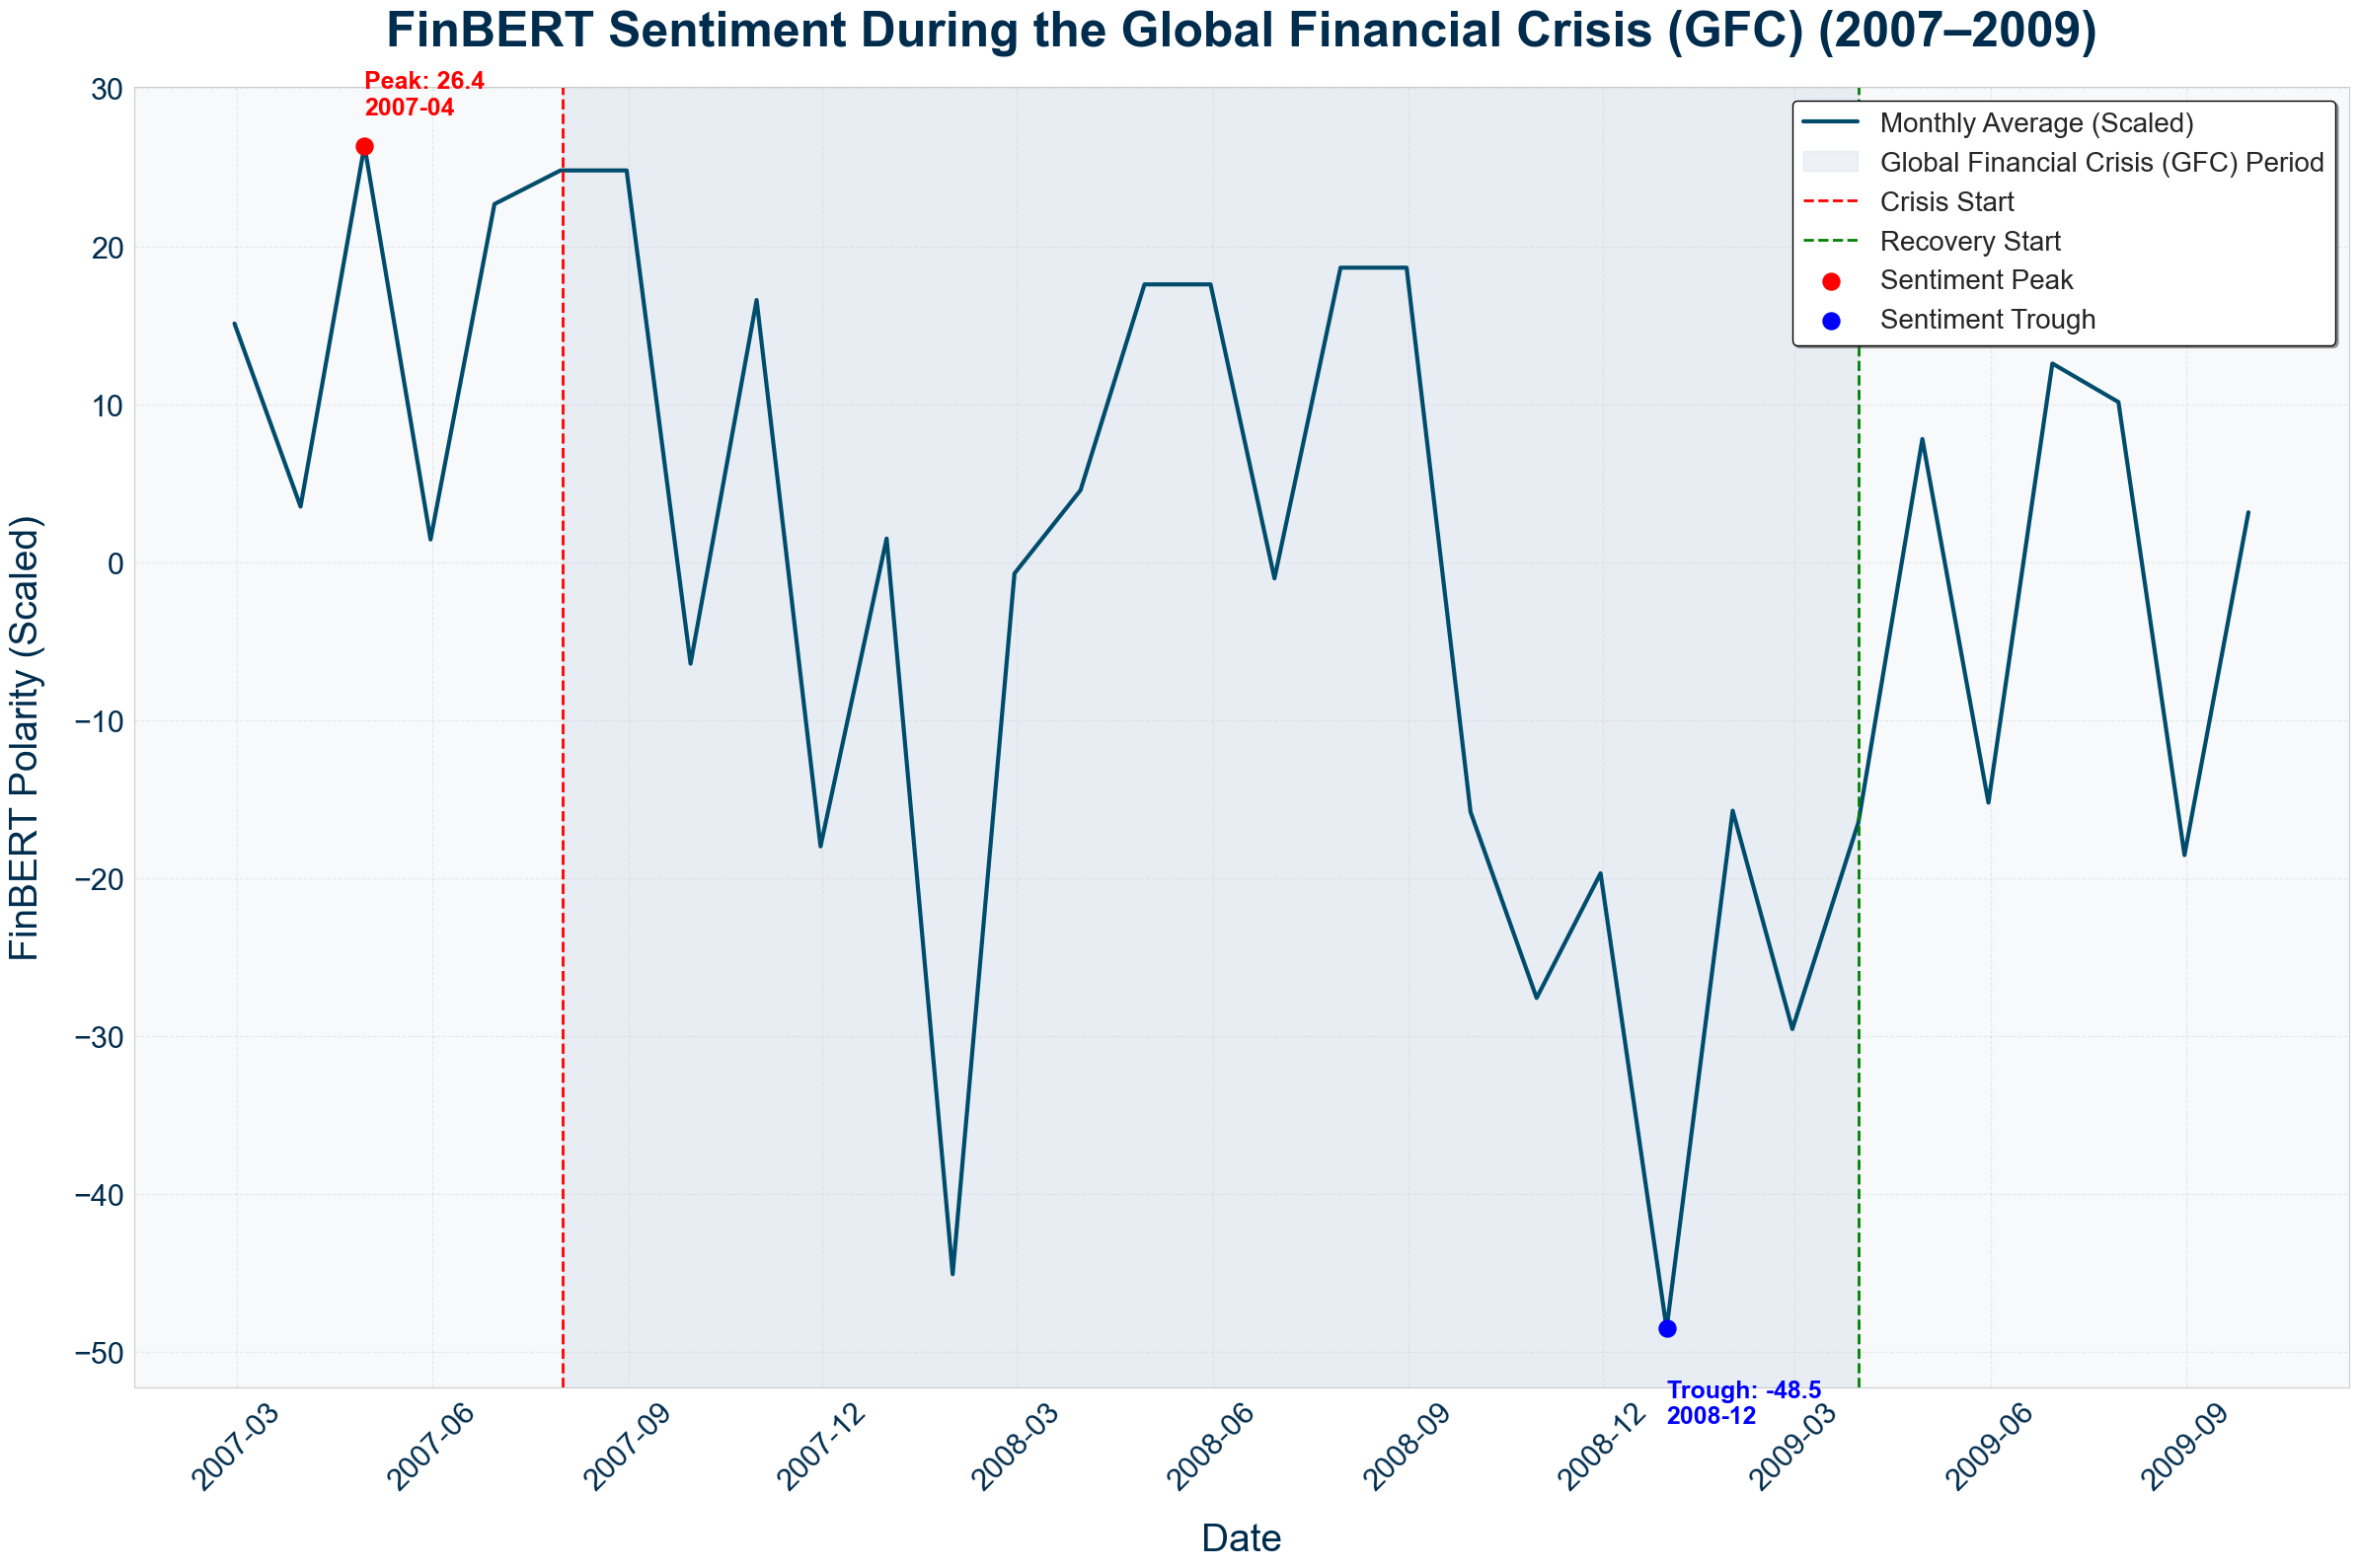

In [52]:
# Ensure Date column is parsed correctly
finbert_sentiment = finbert_sentiment.copy()
finbert_sentiment['Date'] = pd.to_datetime(finbert_sentiment['Date'])

# Define the GFC window
event_name = "Global Financial Crisis (GFC)"
start_date = pd.to_datetime("2007-08-01") - pd.DateOffset(months=6)
end_date = pd.to_datetime("2009-03-31") + pd.DateOffset(months=6)

# Filter the relevant period
event_data = finbert_sentiment[(finbert_sentiment['Date'] >= start_date) & (finbert_sentiment['Date'] <= end_date)]

# Monthly average sentiment
monthly_event_data = event_data.set_index('Date').resample('ME').mean().reset_index()
monthly_event_data['polarity_score_finbert'] = monthly_event_data['polarity_score_finbert'].ffill()
monthly_event_data['polarity_scaled'] = monthly_event_data['polarity_score_finbert'] * 100

# Detect peak and trough
peak_idx = monthly_event_data['polarity_scaled'].idxmax()
trough_idx = monthly_event_data['polarity_scaled'].idxmin()
peak_date = monthly_event_data.loc[peak_idx, 'Date']
peak_value = monthly_event_data.loc[peak_idx, 'polarity_scaled']
trough_date = monthly_event_data.loc[trough_idx, 'Date']
trough_value = monthly_event_data.loc[trough_idx, 'polarity_scaled']

# Plot setup
plt.figure(figsize=(24, 16))
sns.set_style("whitegrid")

# Sentiment curve
plt.plot(monthly_event_data['Date'], monthly_event_data['polarity_scaled'],
         color='#004c6d', linewidth=3, label='Monthly Average (Scaled)')

# Shaded event window
plt.axvspan(pd.to_datetime("2007-08-01"), pd.to_datetime("2009-03-31"),
            color='#c6d2e6', alpha=0.3, label=f"{event_name} Period")

# Vertical event markers
plt.axvline(pd.to_datetime("2007-08-01"), color='red', linestyle='--', linewidth=2, label="Crisis Start")
plt.axvline(pd.to_datetime("2009-03-31"), color='green', linestyle='--', linewidth=2, label="Recovery Start")

# Peak and trough points
plt.scatter([peak_date], [peak_value], color='red', s=150, zorder=5, label='Sentiment Peak')
plt.scatter([trough_date], [trough_value], color='blue', s=150, zorder=5, label='Sentiment Trough')

# Annotate points
plt.text(peak_date, peak_value + 2, f'Peak: {peak_value:.1f}\n{peak_date:%Y-%m}',
         color='red', fontsize=18, weight='bold')
plt.text(trough_date, trough_value - 6, f'Trough: {trough_value:.1f}\n{trough_date:%Y-%m}',
         color='blue', fontsize=18, weight='bold')

# Title and axis labels
plt.title(f"FinBERT Sentiment During the {event_name} (2007–2009)", fontsize=36, pad=30, weight='bold', color='#002c4d')
plt.xlabel("Date", fontsize=28, labelpad=20, color='#002c4d')
plt.ylabel("FinBERT Polarity (Scaled)", fontsize=28, labelpad=20, color='#002c4d')

# Axis ticks and date formatting
plt.xticks(rotation=45, fontsize=22, color='#002c4d')
plt.yticks(fontsize=22, color='#002c4d')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

# Grid and background
plt.grid(True, linestyle='--', alpha=0.4)
plt.gca().set_facecolor('#f8f9fa')

# Styled legend
plt.legend(loc='upper right', fontsize=20, frameon=True, shadow=True, facecolor='white', edgecolor='black', fancybox=True)

# Show/save
plt.tight_layout()
# plt.savefig("gfc_sentiment_annotated.png", dpi=300, bbox_inches="tight")
plt.show()

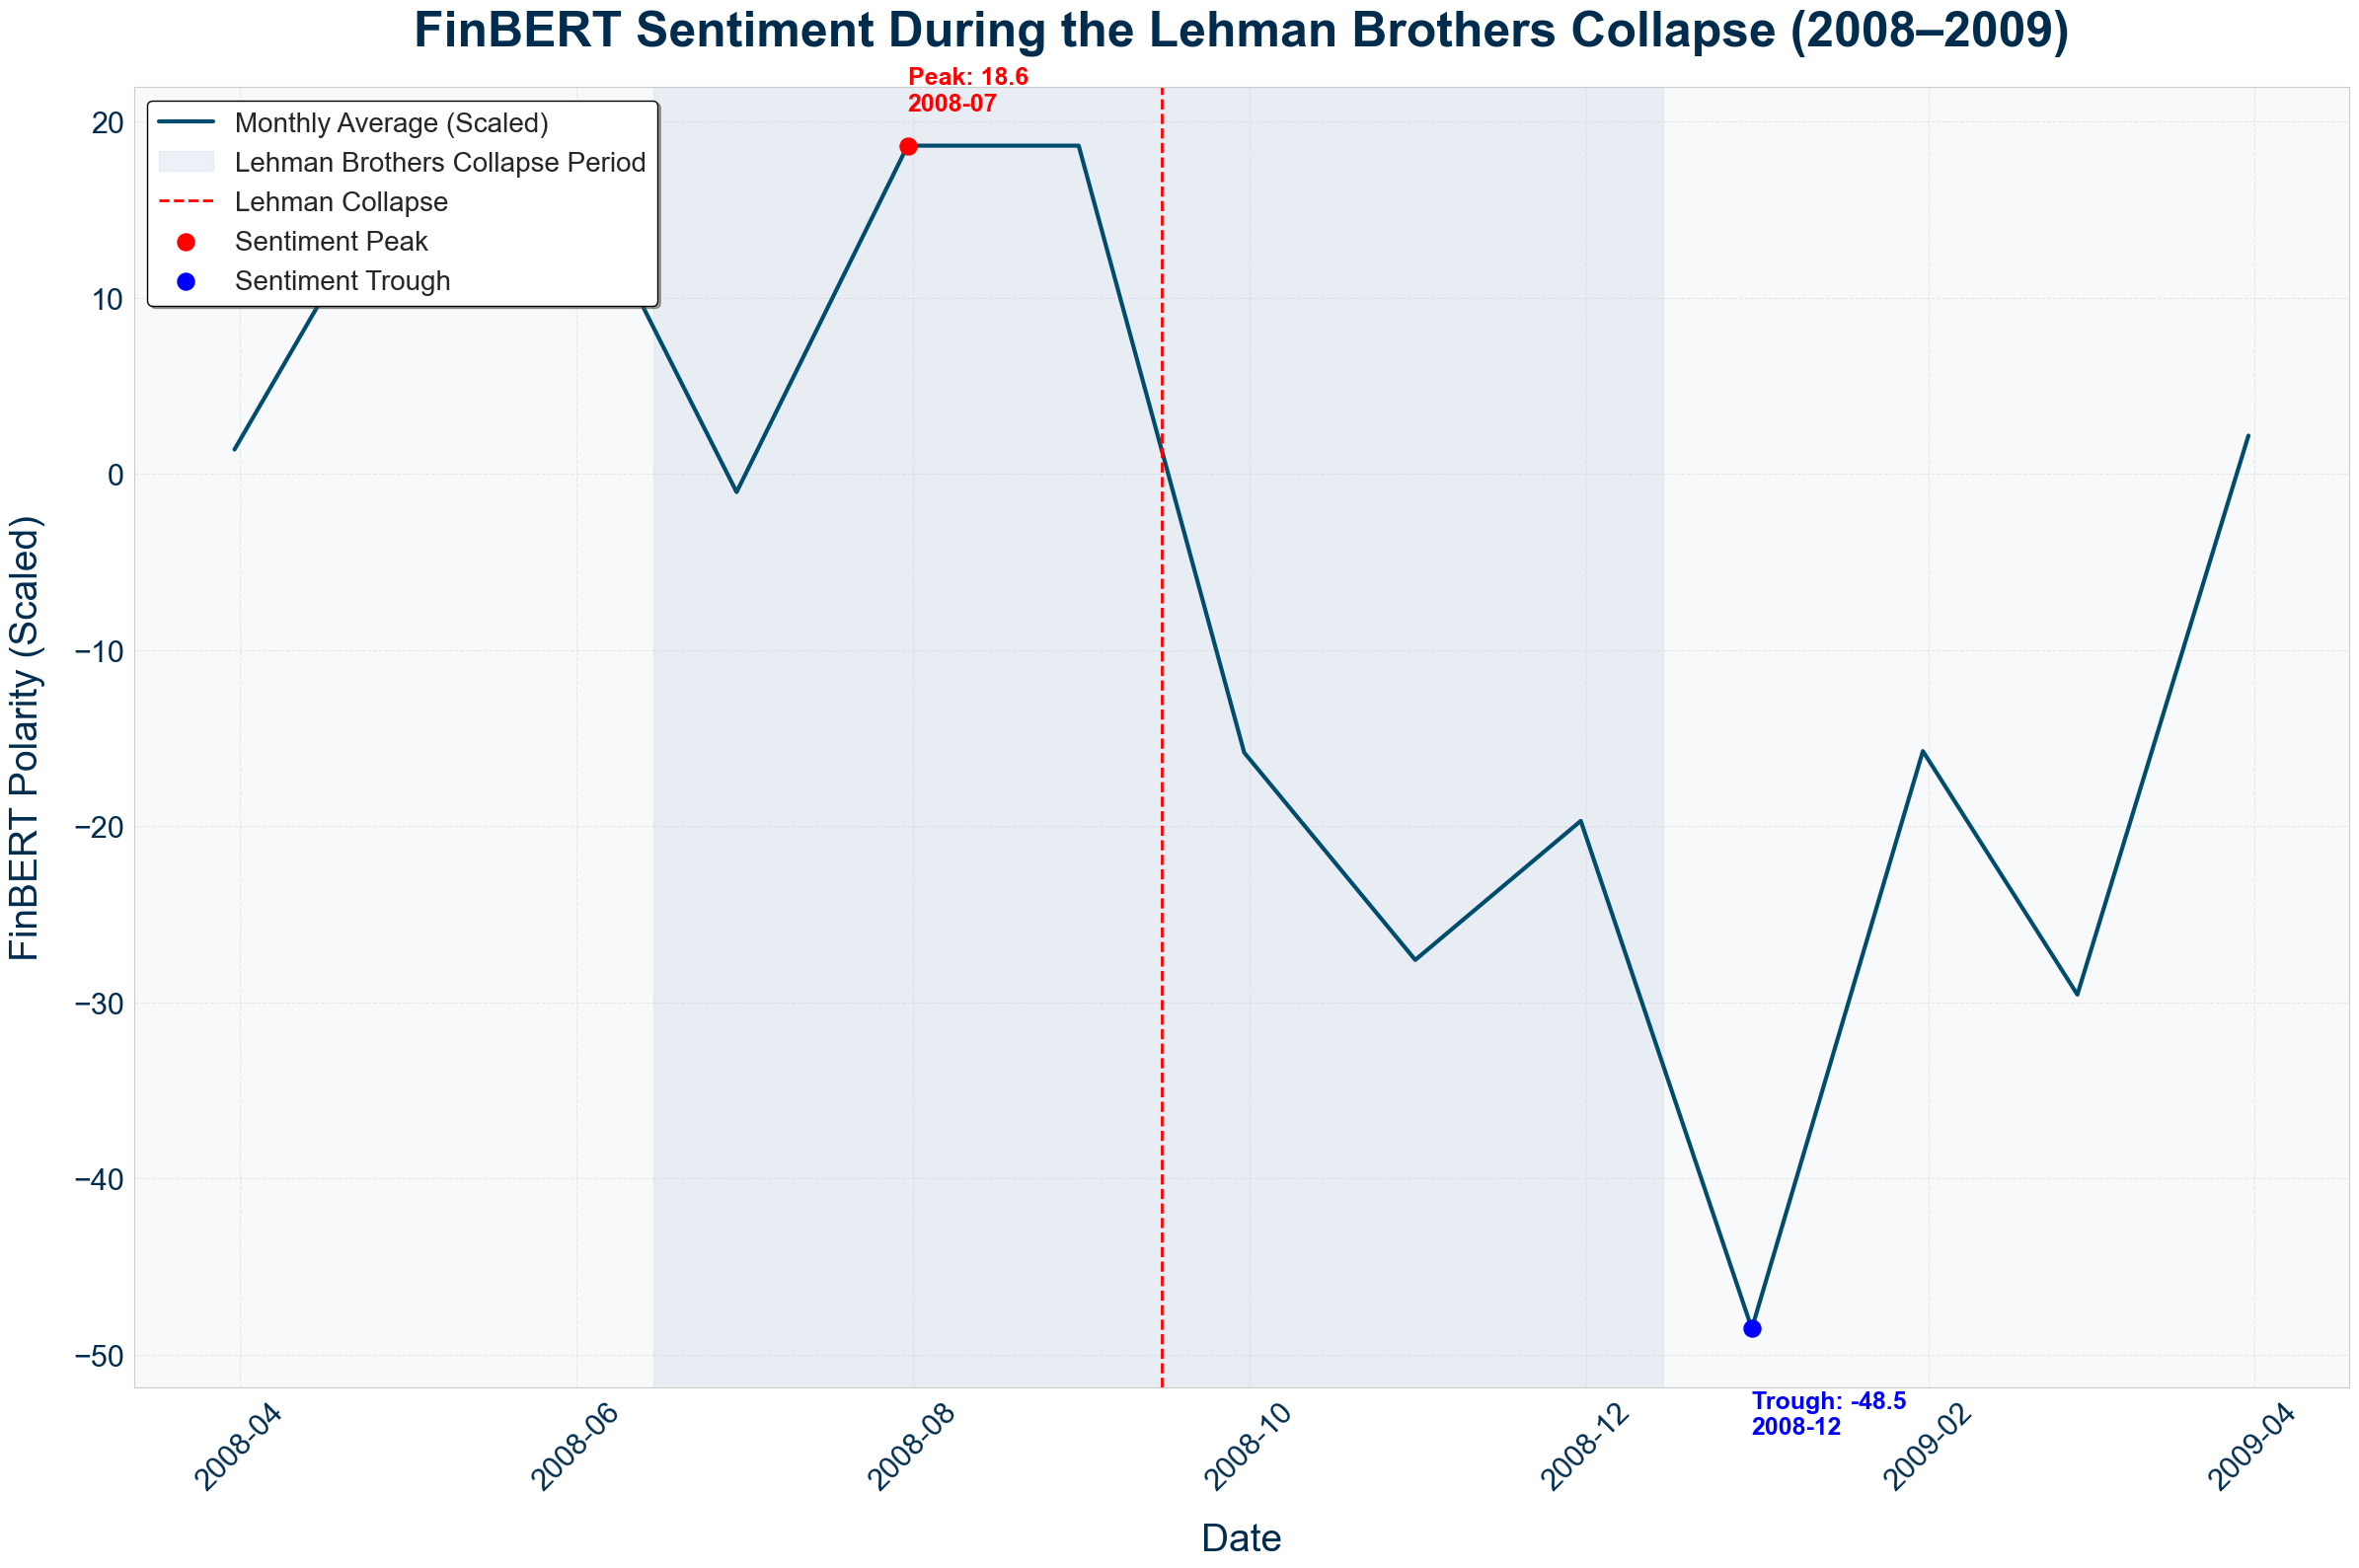

In [54]:
# Ensure datetime formatting
finbert_sentiment = finbert_sentiment.copy()
finbert_sentiment['Date'] = pd.to_datetime(finbert_sentiment['Date'])

# Define the event
event_name = "Lehman Brothers Collapse"
collapse_date = pd.to_datetime("2008-09-15")
start_date = collapse_date - pd.DateOffset(months=6)
end_date = collapse_date + pd.DateOffset(months=6)

# Filter and resample
event_data = finbert_sentiment[(finbert_sentiment['Date'] >= start_date) & (finbert_sentiment['Date'] <= end_date)]
monthly_event_data = event_data.set_index('Date').resample('ME').mean().reset_index()

# Fill missing and scale
monthly_event_data['polarity_score_finbert'] = monthly_event_data['polarity_score_finbert'].ffill()
monthly_event_data['polarity_scaled'] = monthly_event_data['polarity_score_finbert'] * 100

# Peak/trough detection
peak_idx = monthly_event_data['polarity_scaled'].idxmax()
trough_idx = monthly_event_data['polarity_scaled'].idxmin()
peak_date = monthly_event_data.loc[peak_idx, 'Date']
peak_value = monthly_event_data.loc[peak_idx, 'polarity_scaled']
trough_date = monthly_event_data.loc[trough_idx, 'Date']
trough_value = monthly_event_data.loc[trough_idx, 'polarity_scaled']

# Plot setup
plt.figure(figsize=(24, 16))
sns.set_style("whitegrid")

# Plot the trend
plt.plot(monthly_event_data['Date'], monthly_event_data['polarity_scaled'],
         color='#004c6d', linewidth=3, label='Monthly Average (Scaled)')

# Highlight event period ±3 months from collapse
plt.axvspan(collapse_date - pd.DateOffset(months=3), collapse_date + pd.DateOffset(months=3),
            color='#c6d2e6', alpha=0.3, label=f"{event_name} Period")

# Vertical line on collapse date
plt.axvline(collapse_date, color='red', linestyle='--', linewidth=2, label="Lehman Collapse")

# Peak and trough markers
plt.scatter([peak_date], [peak_value], color='red', s=150, zorder=5, label='Sentiment Peak')
plt.scatter([trough_date], [trough_value], color='blue', s=150, zorder=5, label='Sentiment Trough')

# Annotate peak/trough
plt.text(peak_date, peak_value + 2, f'Peak: {peak_value:.1f}\n{peak_date:%Y-%m}',
         color='red', fontsize=18, weight='bold')
plt.text(trough_date, trough_value - 6, f'Trough: {trough_value:.1f}\n{trough_date:%Y-%m}',
         color='blue', fontsize=18, weight='bold')

# Title and labels
plt.title(f"FinBERT Sentiment During the {event_name} (2008–2009)", fontsize=36, pad=30, weight='bold', color='#002c4d')
plt.xlabel("Date", fontsize=28, labelpad=20, color='#002c4d')
plt.ylabel("FinBERT Polarity (Scaled)", fontsize=28, labelpad=20, color='#002c4d')

# Formatting
plt.xticks(rotation=45, fontsize=22, color='#002c4d')
plt.yticks(fontsize=22, color='#002c4d')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.grid(True, linestyle='--', alpha=0.4)
plt.gca().set_facecolor('#f8f9fa')

# Legend
plt.legend(loc='upper left', fontsize=20, frameon=True, shadow=True,
           facecolor='white', edgecolor='black', fancybox=True)

# Save and show
plt.tight_layout()
# plt.savefig("lehman_collapse_sentiment_annotated.png", dpi=300, bbox_inches="tight")
plt.show()


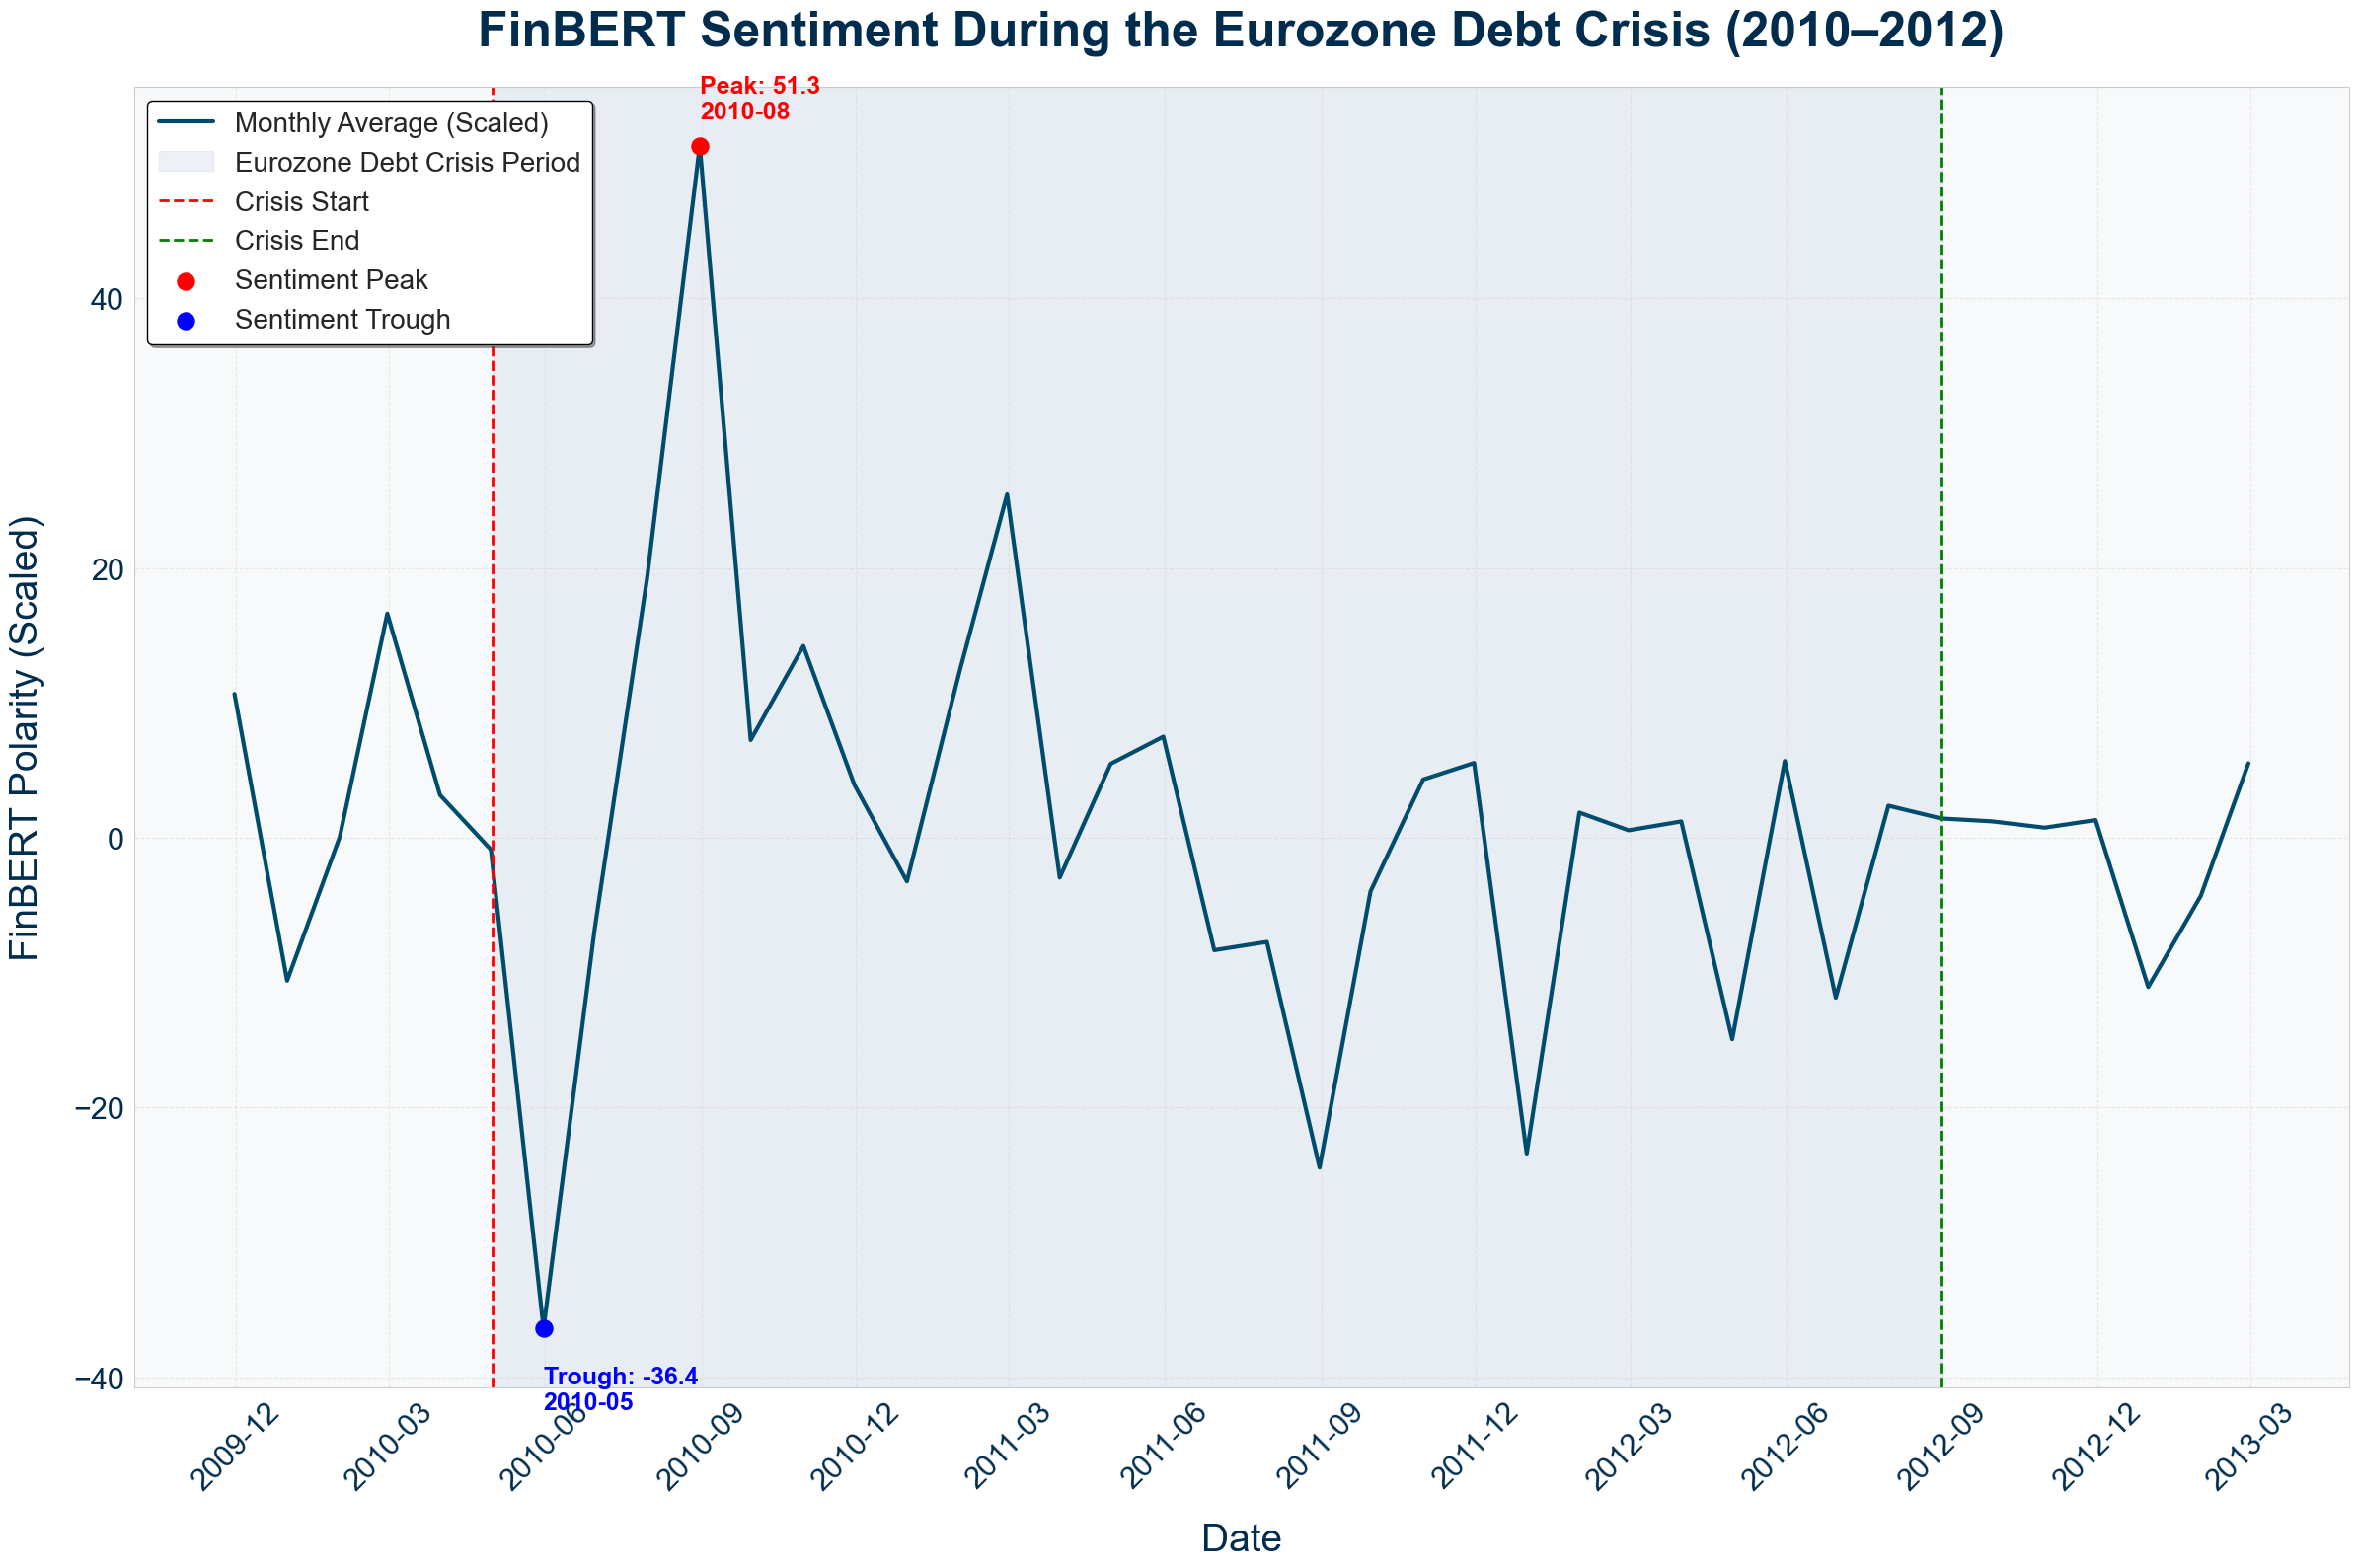

In [64]:
# Prepare data
finbert_sentiment = finbert_sentiment.copy()
finbert_sentiment['Date'] = pd.to_datetime(finbert_sentiment['Date'])

# Event definition
event_name = "Eurozone Debt Crisis"
crisis_start = pd.to_datetime("2010-05-01")
crisis_end = pd.to_datetime("2012-08-31")
start_date = crisis_start - pd.DateOffset(months=6)
end_date = crisis_end + pd.DateOffset(months=6)

# Filter and resample
event_data = finbert_sentiment[(finbert_sentiment['Date'] >= start_date) & (finbert_sentiment['Date'] <= end_date)]
monthly_event_data = event_data.set_index('Date').resample('ME').mean().reset_index()

# Fill and scale
monthly_event_data['polarity_score_finbert'] = monthly_event_data['polarity_score_finbert'].ffill()
monthly_event_data['polarity_scaled'] = monthly_event_data['polarity_score_finbert'] * 100

# Detect peak and trough
peak_idx = monthly_event_data['polarity_scaled'].idxmax()
trough_idx = monthly_event_data['polarity_scaled'].idxmin()
peak_date = monthly_event_data.loc[peak_idx, 'Date']
peak_value = monthly_event_data.loc[peak_idx, 'polarity_scaled']
trough_date = monthly_event_data.loc[trough_idx, 'Date']
trough_value = monthly_event_data.loc[trough_idx, 'polarity_scaled']

# Plot
plt.figure(figsize=(24, 16))
sns.set_style("whitegrid")
plt.plot(monthly_event_data['Date'], monthly_event_data['polarity_scaled'], color='#004c6d', linewidth=3, label='Monthly Average (Scaled)')

# Highlight crisis window
plt.axvspan(crisis_start, crisis_end, color='#c6d2e6', alpha=0.3, label=f"{event_name} Period")
plt.axvline(crisis_start, color='red', linestyle='--', linewidth=2, label="Crisis Start")
plt.axvline(crisis_end, color='green', linestyle='--', linewidth=2, label="Crisis End")

# Peak/trough annotations
plt.scatter([peak_date], [peak_value], color='red', s=150, zorder=5, label='Sentiment Peak')
plt.scatter([trough_date], [trough_value], color='blue', s=150, zorder=5, label='Sentiment Trough')
plt.text(peak_date, peak_value + 2, f'Peak: {peak_value:.1f}\n{peak_date:%Y-%m}', color='red', fontsize=18, weight='bold')
plt.text(trough_date, trough_value - 6, f'Trough: {trough_value:.1f}\n{trough_date:%Y-%m}', color='blue', fontsize=18, weight='bold')

# Labels and styling
plt.title(f"FinBERT Sentiment During the {event_name} (2010–2012)", fontsize=36, pad=30, weight='bold', color='#002c4d')
plt.xlabel("Date", fontsize=28, labelpad=20, color='#002c4d')
plt.ylabel("FinBERT Polarity (Scaled)", fontsize=28, labelpad=20, color='#002c4d')
plt.xticks(rotation=45, fontsize=22, color='#002c4d')
plt.yticks(fontsize=22, color='#002c4d')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.grid(True, linestyle='--', alpha=0.4)
plt.gca().set_facecolor('#f8f9fa')

# Legend
plt.legend(loc='upper left', fontsize=20, frameon=True, shadow=True, facecolor='white', edgecolor='black', fancybox=True)

# Save and show
plt.tight_layout()
# plt.savefig("eurozone_crisis_sentiment_annotated.png", dpi=300, bbox_inches="tight")
plt.show()


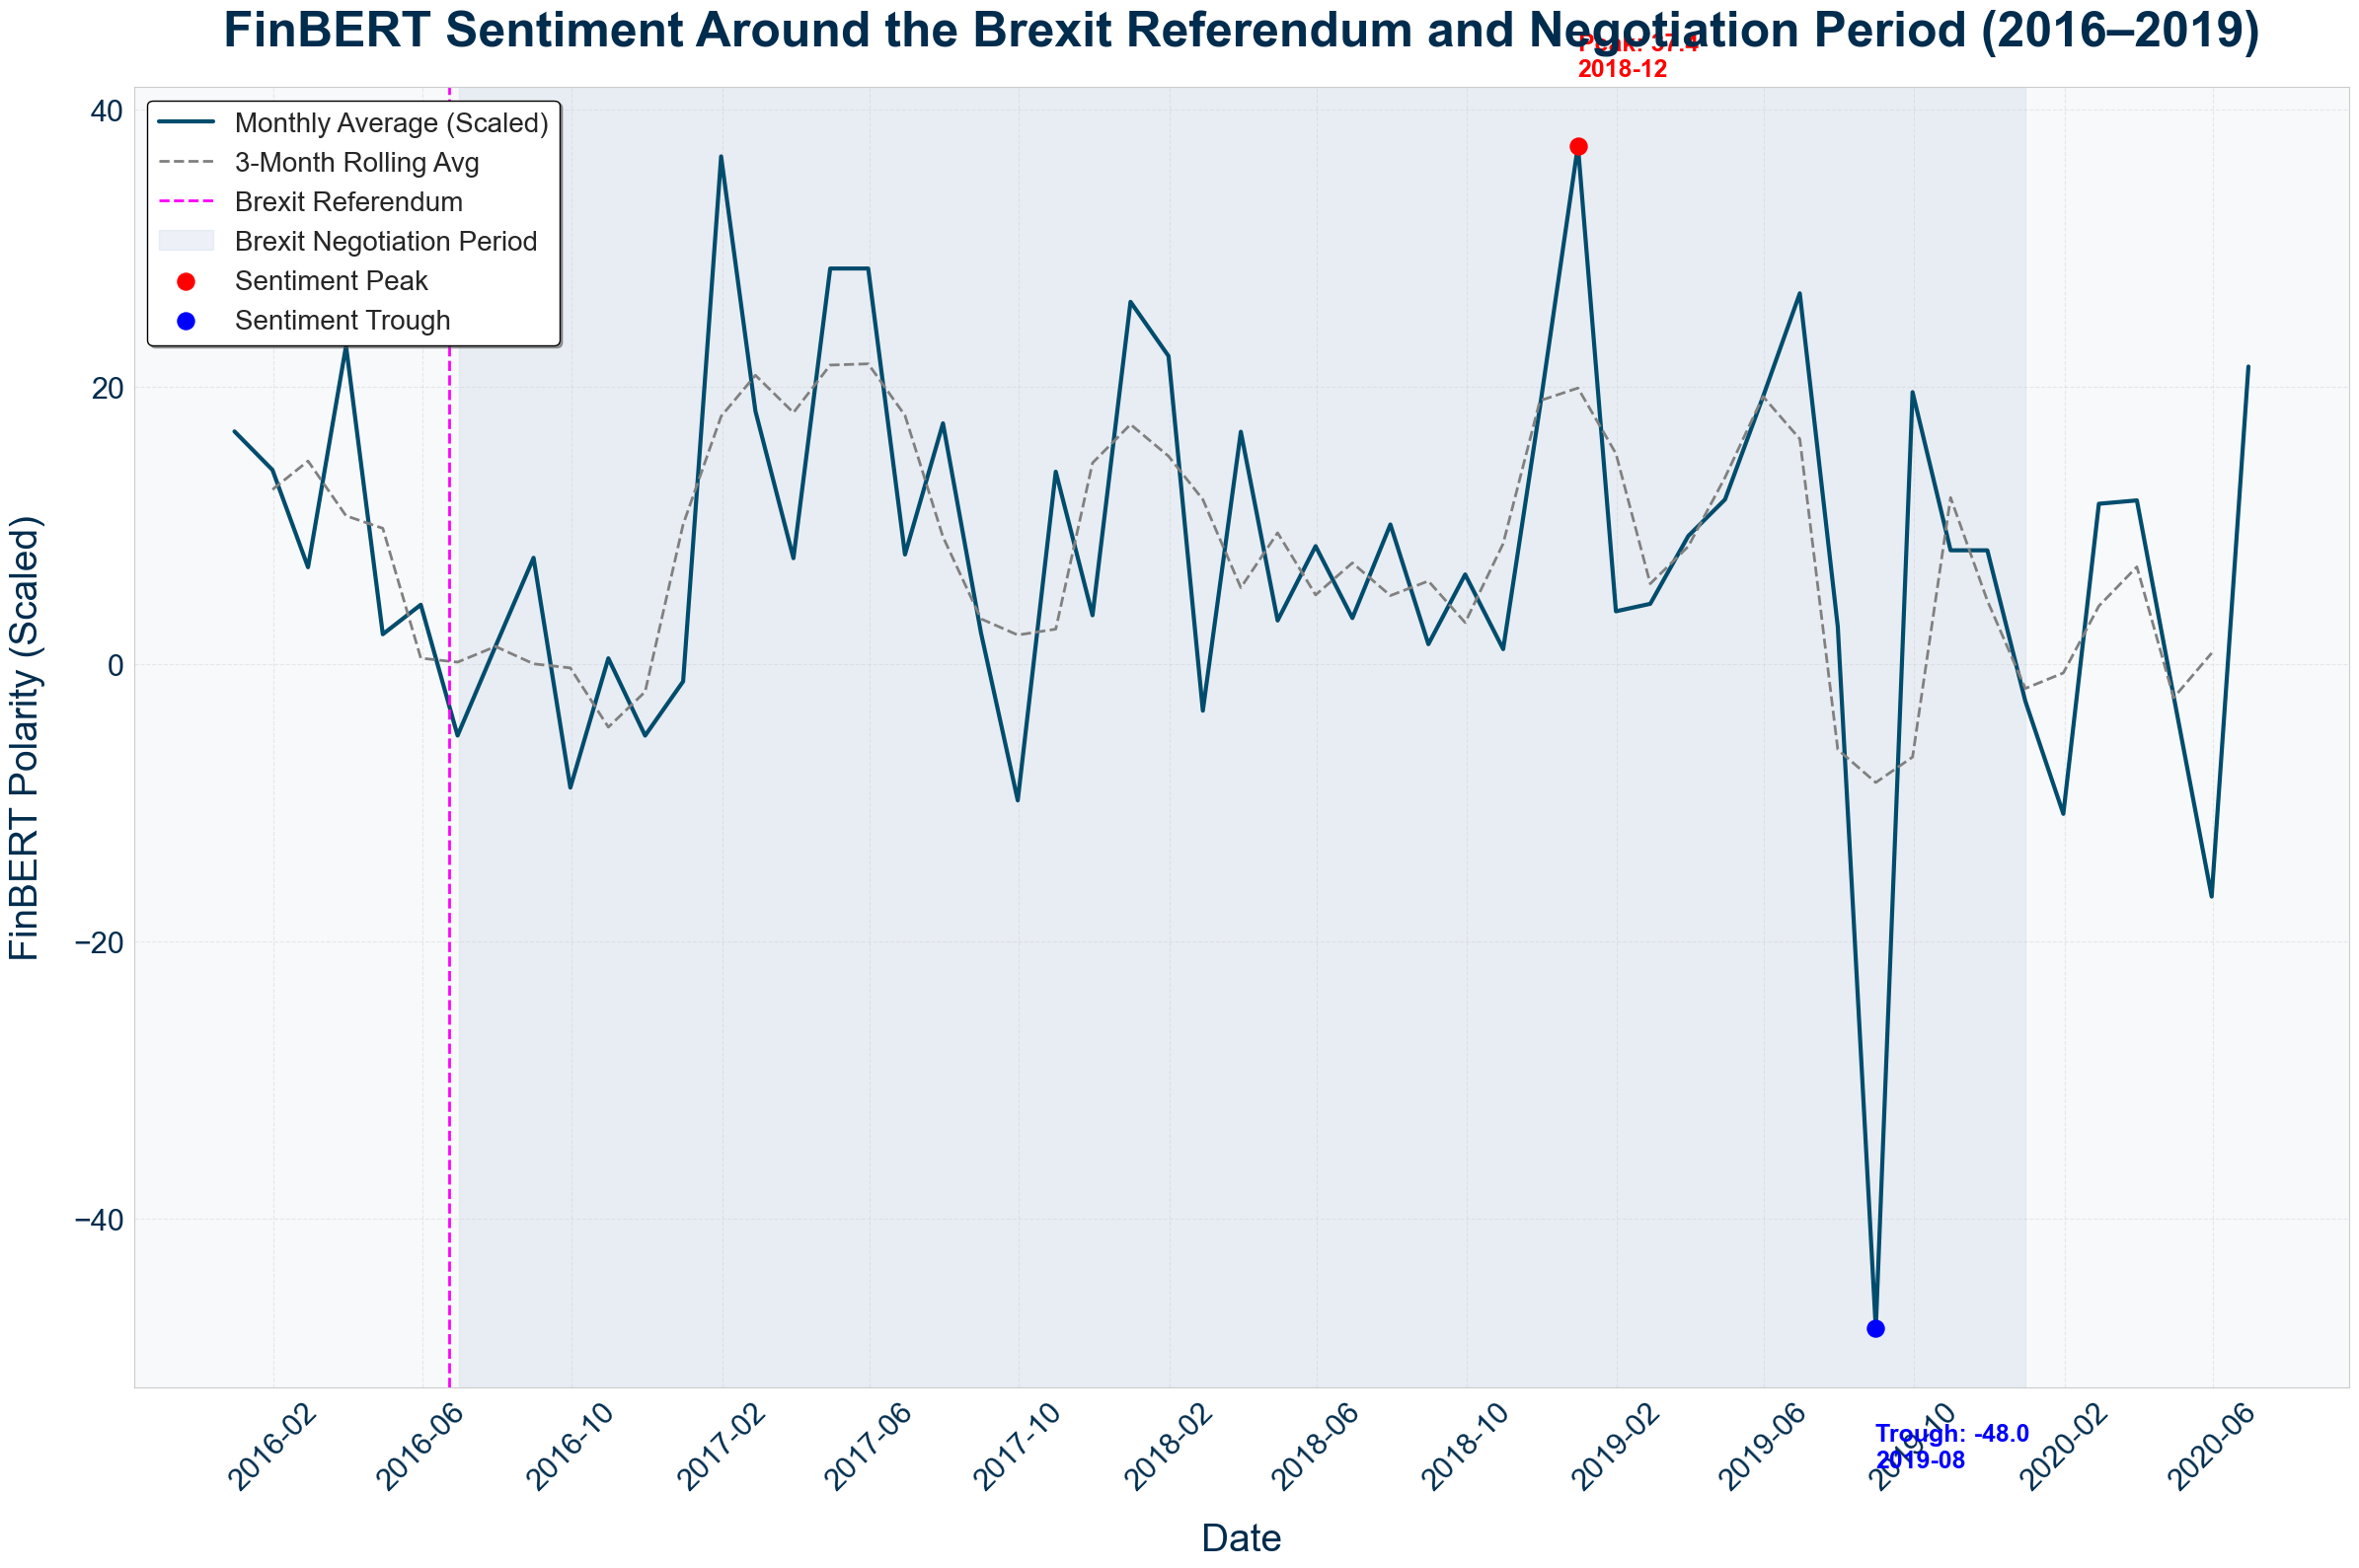

In [72]:
# Ensure datetime format
finbert_sentiment = finbert_sentiment.copy()
finbert_sentiment['Date'] = pd.to_datetime(finbert_sentiment['Date'])

# Define the Brexit periods
events = [
    {"Event": "Brexit Referendum", "Start": "2016-06-23", "End": "2016-06-23"},
    {"Event": "Brexit Negotiation Period", "Start": "2016-07-01", "End": "2019-12-31"}
]

# Define overall plotting window
overall_start = pd.to_datetime("2016-06-01") - pd.DateOffset(months=6)
overall_end = pd.to_datetime("2019-12-31") + pd.DateOffset(months=6)
event_data = finbert_sentiment[(finbert_sentiment['Date'] >= overall_start) & (finbert_sentiment['Date'] <= overall_end)]

# Resample monthly and preprocess
monthly_event_data = event_data.set_index('Date').resample('ME').mean().reset_index()
monthly_event_data['polarity_score_finbert'] = monthly_event_data['polarity_score_finbert'].ffill()
monthly_event_data['polarity_scaled'] = monthly_event_data['polarity_score_finbert'] * 100
monthly_event_data['rolling_mean'] = monthly_event_data['polarity_scaled'].rolling(window=3, center=True).mean()

# Detect peak/trough
peak_idx = monthly_event_data['polarity_scaled'].idxmax()
trough_idx = monthly_event_data['polarity_scaled'].idxmin()
peak_date = monthly_event_data.loc[peak_idx, 'Date']
peak_value = monthly_event_data.loc[peak_idx, 'polarity_scaled']
trough_date = monthly_event_data.loc[trough_idx, 'Date']
trough_value = monthly_event_data.loc[trough_idx, 'polarity_scaled']

# Plot setup
plt.figure(figsize=(24, 16))
sns.set_style("whitegrid")

# Plot sentiment and rolling average
plt.plot(monthly_event_data['Date'], monthly_event_data['polarity_scaled'],
         color='#004c6d', linewidth=3, label='Monthly Average (Scaled)')
plt.plot(monthly_event_data['Date'], monthly_event_data['rolling_mean'],
         linestyle='--', color='gray', linewidth=2, label='3-Month Rolling Avg')

# Avoid duplicate legend labels
added_labels = set()
for event in events:
    start = pd.to_datetime(event["Start"])
    end = pd.to_datetime(event["End"])
    label = event["Event"] if event["Event"] not in added_labels else None
    if start == end:
        plt.axvline(start, color='magenta', linestyle='--', linewidth=2, label=label)
    else:
        plt.axvspan(start, end, color='#c6d2e6', alpha=0.3, label=label)
    added_labels.add(event["Event"])

# Annotate peak and trough
plt.scatter([peak_date], [peak_value], color='red', s=150, zorder=5, label='Sentiment Peak')
plt.scatter([trough_date], [trough_value], color='blue', s=150, zorder=5, label='Sentiment Trough')
plt.text(peak_date, peak_value + 5, f'Peak: {peak_value:.1f}\n{peak_date:%Y-%m}', color='red', fontsize=18, weight='bold')
plt.text(trough_date, trough_value - 10, f'Trough: {trough_value:.1f}\n{trough_date:%Y-%m}', color='blue', fontsize=18, weight='bold')

# Titles and labels
plt.title("FinBERT Sentiment Around the Brexit Referendum and Negotiation Period (2016–2019)",
          fontsize=36, pad=30, weight='bold', color='#002c4d')
plt.xlabel("Date", fontsize=28, labelpad=20, color='#002c4d')
plt.ylabel("FinBERT Polarity (Scaled)", fontsize=28, labelpad=20, color='#002c4d')

# Format axis
plt.xticks(rotation=45, fontsize=22, color='#002c4d')
plt.yticks(fontsize=22, color='#002c4d')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().set_facecolor('#f8f9fa')
plt.grid(True, linestyle='--', alpha=0.4)

# Legend
plt.legend(loc='upper left', fontsize=20, frameon=True, shadow=True,
           facecolor='white', edgecolor='black', fancybox=True)

# Final layout and save
plt.tight_layout()
# plt.savefig("brexit_sentiment_final.png", dpi=300, bbox_inches="tight")
plt.show()

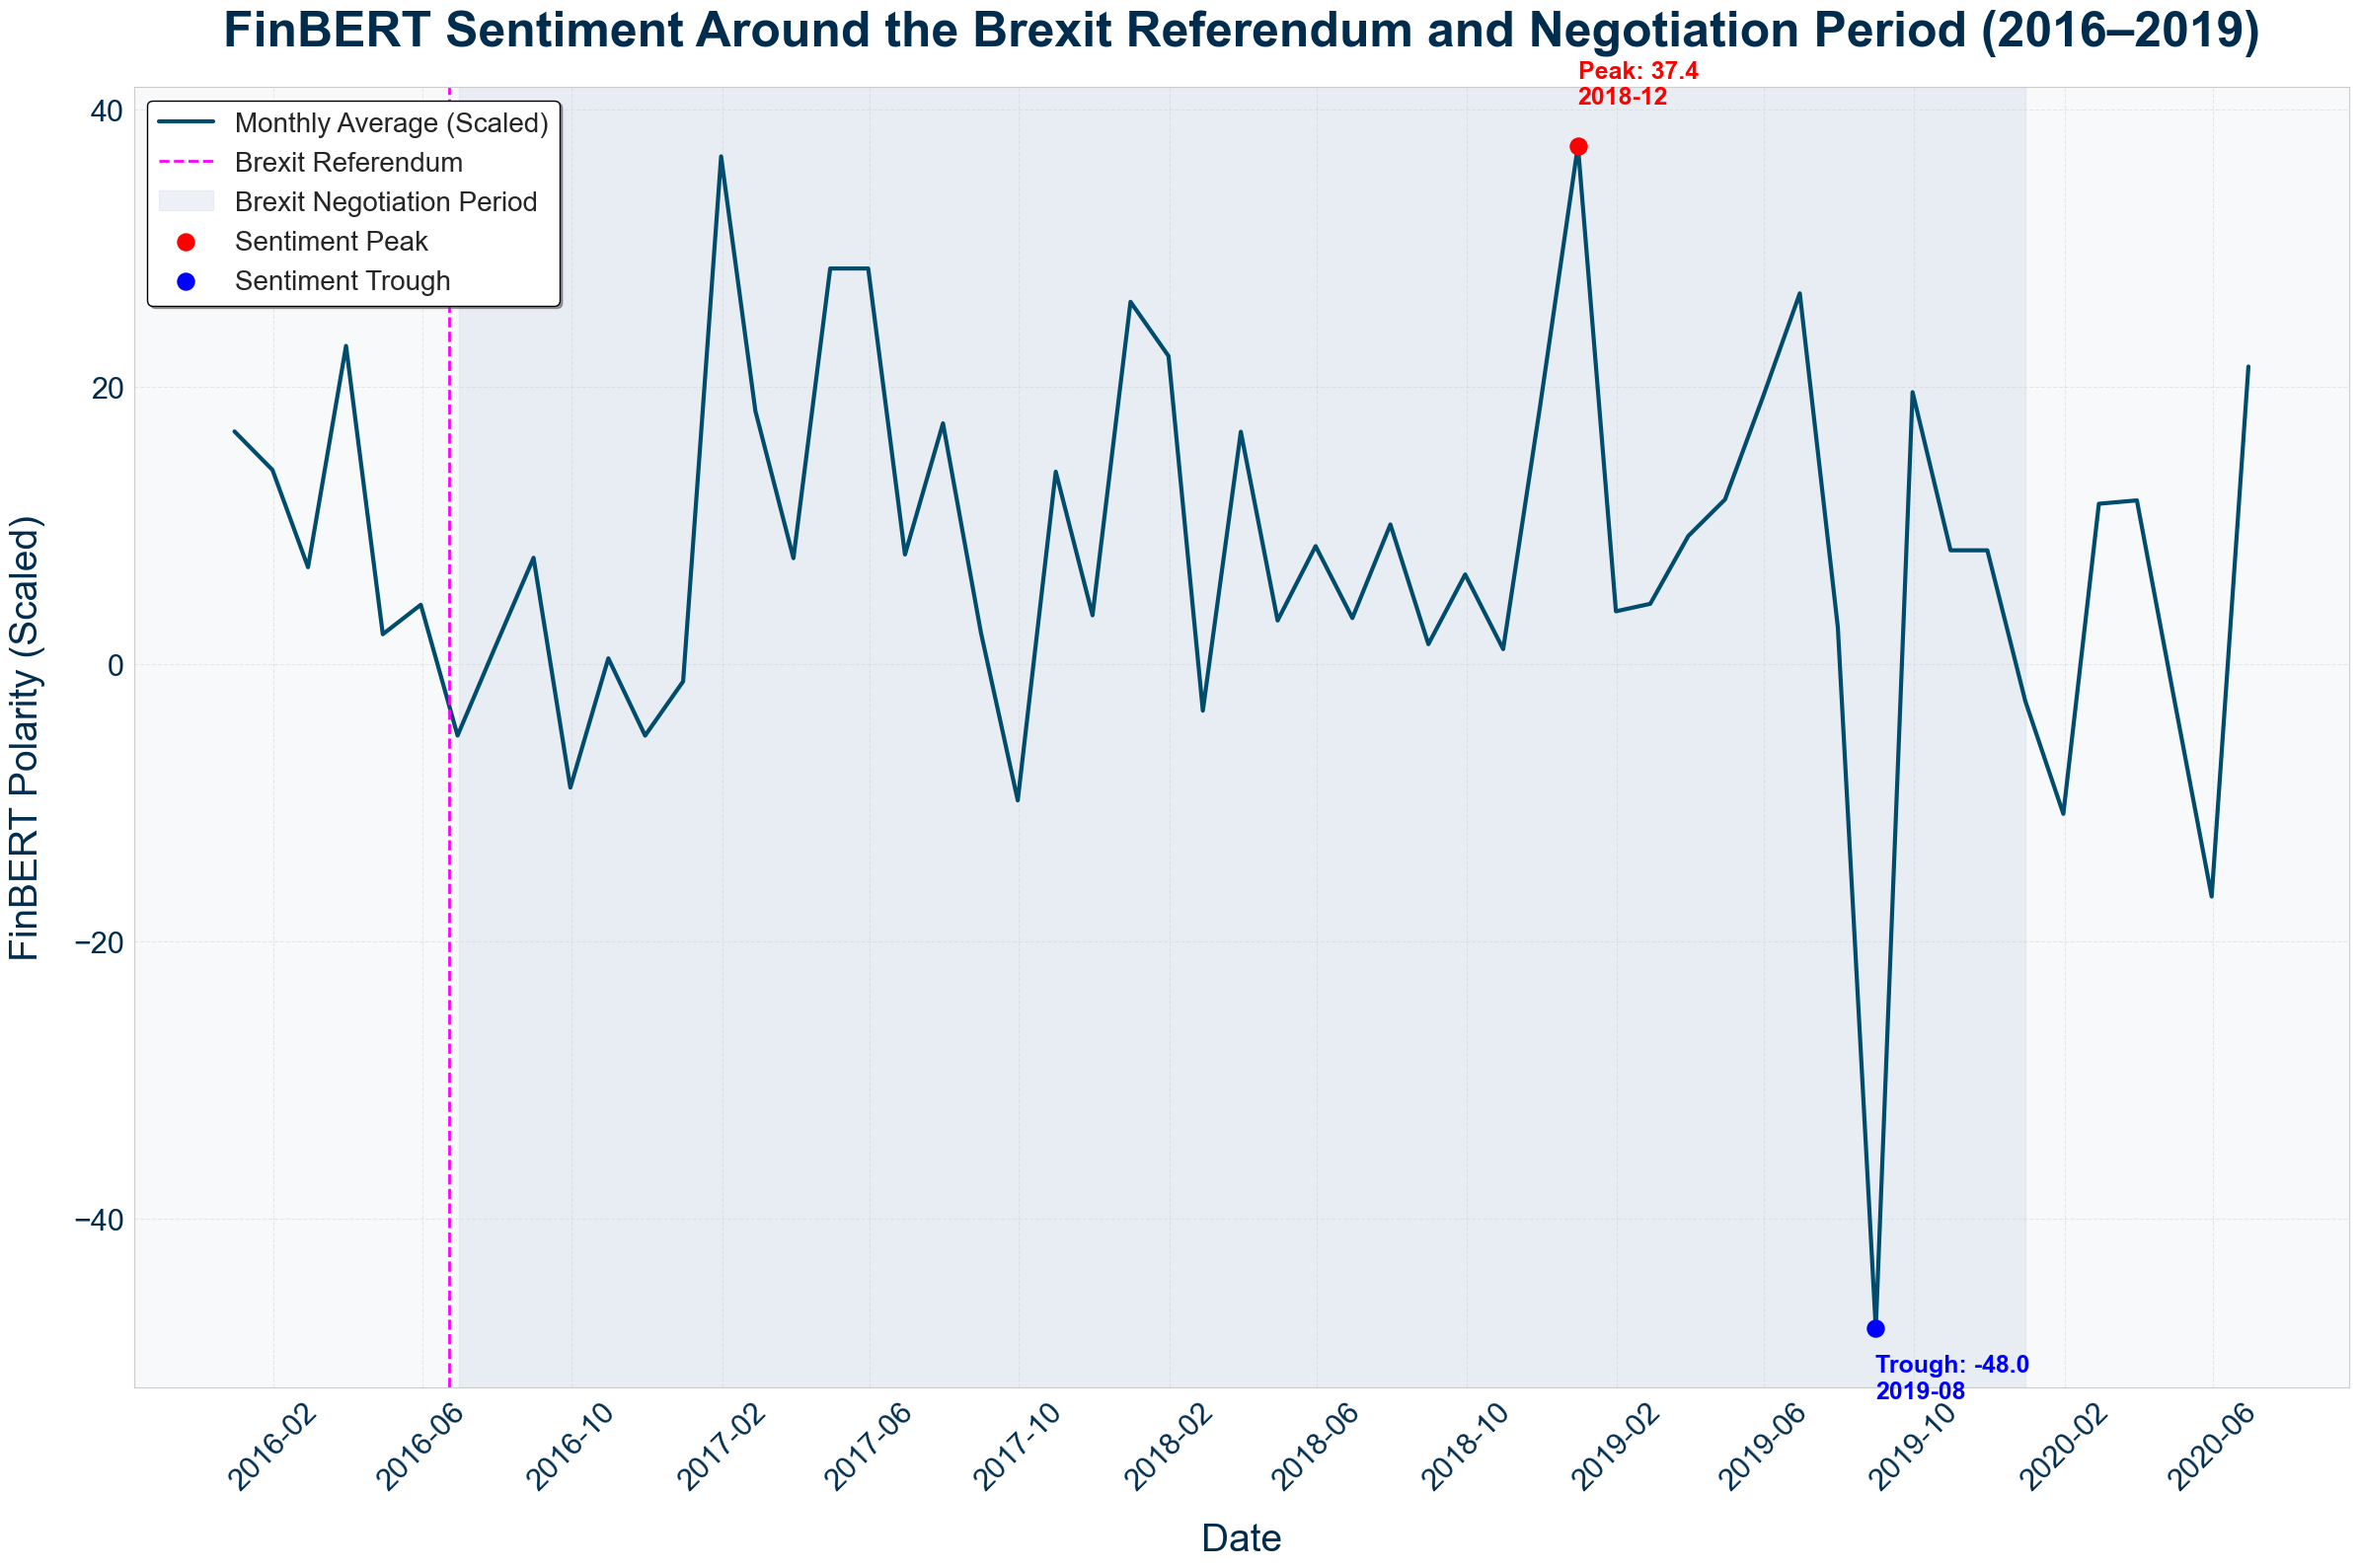

In [88]:
# Ensure datetime format
finbert_sentiment = finbert_sentiment.copy()
finbert_sentiment['Date'] = pd.to_datetime(finbert_sentiment['Date'])

# Define the Brexit periods
events = [
    {"Event": "Brexit Referendum", "Start": "2016-06-23", "End": "2016-06-23"},
    {"Event": "Brexit Negotiation Period", "Start": "2016-07-01", "End": "2019-12-31"}
]

# Define overall plotting window
overall_start = pd.to_datetime("2016-06-01") - pd.DateOffset(months=6)
overall_end = pd.to_datetime("2019-12-31") + pd.DateOffset(months=6)
event_data = finbert_sentiment[(finbert_sentiment['Date'] >= overall_start) & (finbert_sentiment['Date'] <= overall_end)]

# Resample monthly and preprocess
monthly_event_data = event_data.set_index('Date').resample('ME').mean().reset_index()
monthly_event_data['polarity_score_finbert'] = monthly_event_data['polarity_score_finbert'].ffill()
monthly_event_data['polarity_scaled'] = monthly_event_data['polarity_score_finbert'] * 100

# Detect peak/trough
peak_idx = monthly_event_data['polarity_scaled'].idxmax()
trough_idx = monthly_event_data['polarity_scaled'].idxmin()
peak_date = monthly_event_data.loc[peak_idx, 'Date']
peak_value = monthly_event_data.loc[peak_idx, 'polarity_scaled']
trough_date = monthly_event_data.loc[trough_idx, 'Date']
trough_value = monthly_event_data.loc[trough_idx, 'polarity_scaled']

# Plot setup
plt.figure(figsize=(24, 16))
sns.set_style("whitegrid")

# Plot sentiment line only (no rolling average)
plt.plot(monthly_event_data['Date'], monthly_event_data['polarity_scaled'],
         color='#004c6d', linewidth=3, label='Monthly Average (Scaled)')

# Highlight event periods
added_labels = set()
for event in events:
    start = pd.to_datetime(event["Start"])
    end = pd.to_datetime(event["End"])
    label = event["Event"] if event["Event"] not in added_labels else None
    if start == end:
        plt.axvline(start, color='magenta', linestyle='--', linewidth=2, label=label)
    else:
        plt.axvspan(start, end, color='#c6d2e6', alpha=0.3, label=label)
    added_labels.add(event["Event"])

# Annotate peak and trough
plt.scatter([peak_date], [peak_value], color='red', s=150, zorder=5, label='Sentiment Peak')
plt.scatter([trough_date], [trough_value], color='blue', s=150, zorder=5, label='Sentiment Trough')
plt.text(peak_date, peak_value + 3, f'Peak: {peak_value:.1f}\n{peak_date:%Y-%m}', color='red', fontsize=18, weight='bold')
plt.text(trough_date, trough_value - 5, f'Trough: {trough_value:.1f}\n{trough_date:%Y-%m}', color='blue', fontsize=18, weight='bold')

# Titles and labels
plt.title("FinBERT Sentiment Around the Brexit Referendum and Negotiation Period (2016–2019)",
          fontsize=36, pad=30, weight='bold', color='#002c4d')
plt.xlabel("Date", fontsize=28, labelpad=20, color='#002c4d')
plt.ylabel("FinBERT Polarity (Scaled)", fontsize=28, labelpad=20, color='#002c4d')

# Format axis
plt.xticks(rotation=45, fontsize=22, color='#002c4d')
plt.yticks(fontsize=22, color='#002c4d')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().set_facecolor('#f8f9fa')
plt.grid(True, linestyle='--', alpha=0.4)

# Legend
plt.legend(loc='upper left', fontsize=20, frameon=True, shadow=True,
           facecolor='white', edgecolor='black', fancybox=True)

# Final layout and show
plt.tight_layout()
# plt.savefig("brexit_sentiment_clean.png", dpi=300, bbox_inches="tight")
plt.show()

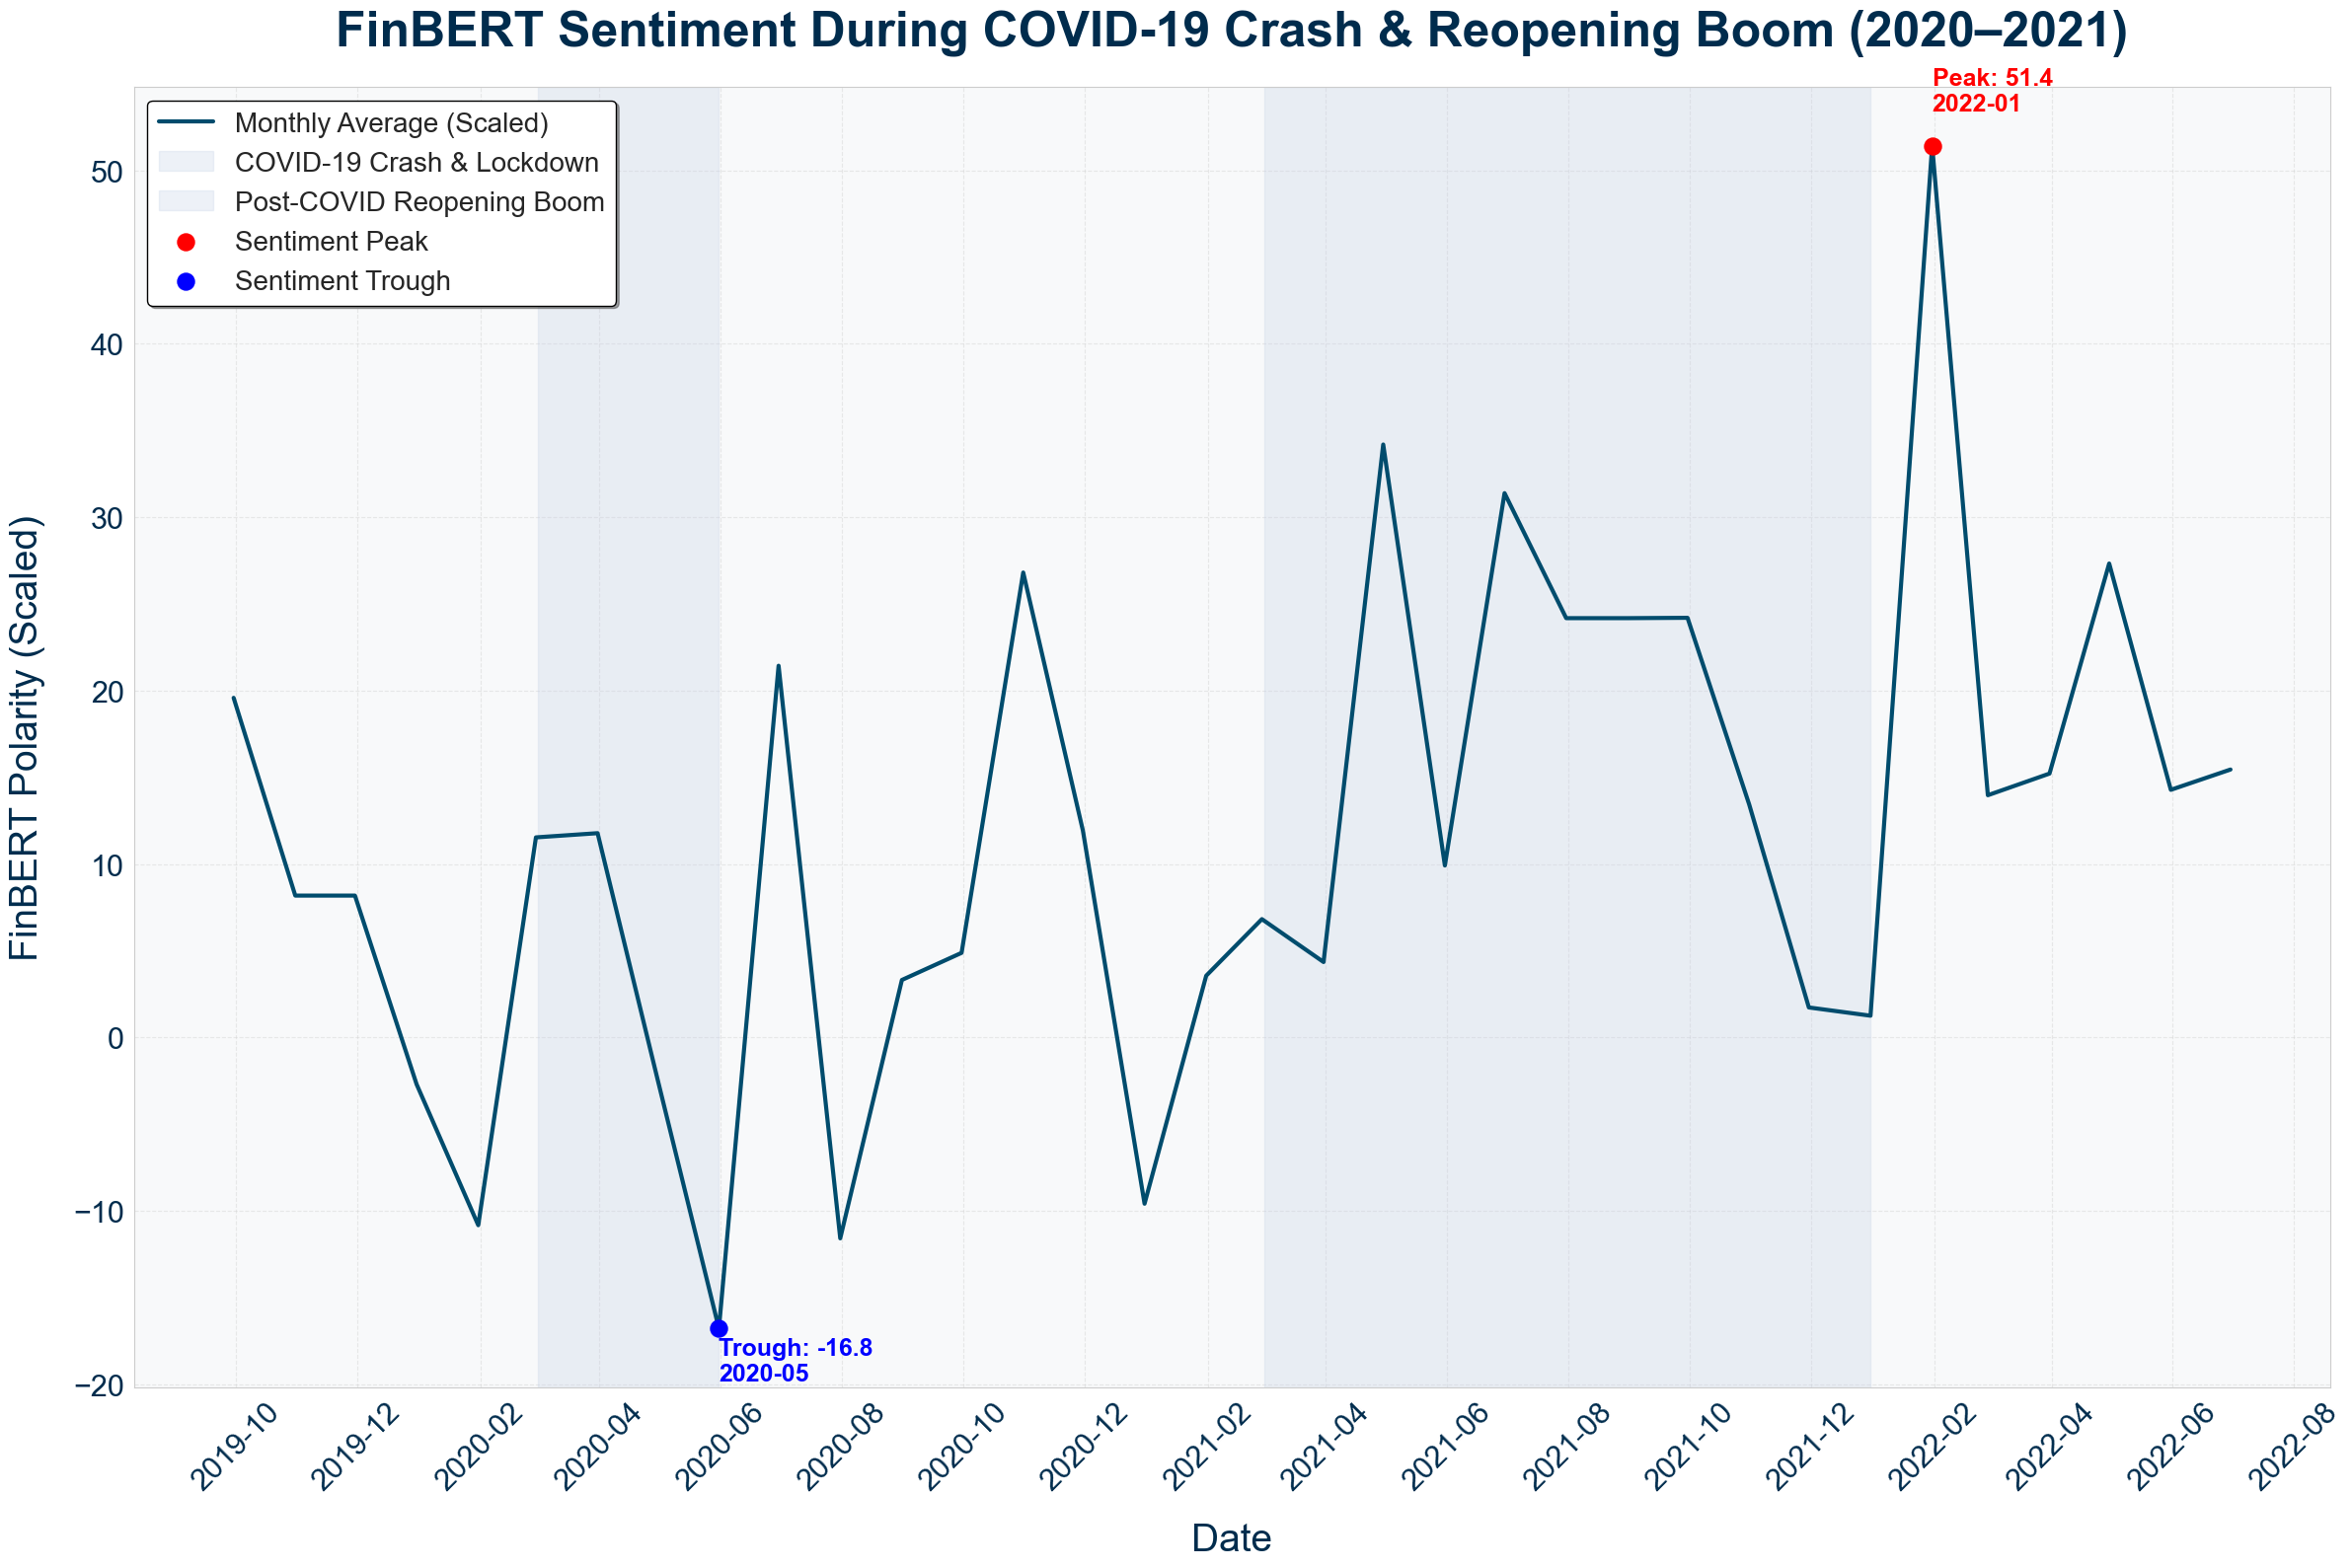

In [102]:
# Ensure datetime format
finbert_sentiment = finbert_sentiment.copy()
finbert_sentiment['Date'] = pd.to_datetime(finbert_sentiment['Date'])

# Define COVID-related periods
events = [
    {"Event": "COVID-19 Crash & Lockdown", "Start": "2020-03-01", "End": "2020-05-31"},
    {"Event": "Post-COVID Reopening Boom", "Start": "2021-03-01", "End": "2021-12-31"}
]

# Define plotting window
overall_start = pd.to_datetime("2020-03-01") - pd.DateOffset(months=6)
overall_end = pd.to_datetime("2021-12-31") + pd.DateOffset(months=6)
event_data = finbert_sentiment[(finbert_sentiment['Date'] >= overall_start) & (finbert_sentiment['Date'] <= overall_end)]

# Resample monthly and scale sentiment
monthly_event_data = event_data.set_index('Date').resample('ME').mean().reset_index()
monthly_event_data['polarity_score_finbert'] = monthly_event_data['polarity_score_finbert'].ffill()
monthly_event_data['polarity_scaled'] = monthly_event_data['polarity_score_finbert'] * 100

# Detect sentiment peak/trough
peak_idx = monthly_event_data['polarity_scaled'].idxmax()
trough_idx = monthly_event_data['polarity_scaled'].idxmin()
peak_date = monthly_event_data.loc[peak_idx, 'Date']
peak_value = monthly_event_data.loc[peak_idx, 'polarity_scaled']
trough_date = monthly_event_data.loc[trough_idx, 'Date']
trough_value = monthly_event_data.loc[trough_idx, 'polarity_scaled']

# Plot setup
plt.figure(figsize=(24, 16))
sns.set_style("whitegrid")

# Plot sentiment curve
plt.plot(monthly_event_data['Date'], monthly_event_data['polarity_scaled'], color='#004c6d', linewidth=3, label='Monthly Average (Scaled)')

# Highlight event spans
added_labels = set()
for event in events:
    start = pd.to_datetime(event["Start"])
    end = pd.to_datetime(event["End"])
    label = event["Event"] if event["Event"] not in added_labels else None
    plt.axvspan(start, end, color='#c6d2e6', alpha=0.3, label=label)
    added_labels.add(event["Event"])

# Annotate sentiment extremes
plt.scatter([peak_date], [peak_value], color='red', s=150, zorder=5, label='Sentiment Peak')
plt.scatter([trough_date], [trough_value], color='blue', s=150, zorder=5, label='Sentiment Trough')
plt.text(peak_date, peak_value + 2, f'Peak: {peak_value:.1f}\n{peak_date:%Y-%m}', color='red', fontsize=18, weight='bold')
plt.text(trough_date, trough_value - 3, f'Trough: {trough_value:.1f}\n{trough_date:%Y-%m}', color='blue', fontsize=18, weight='bold')

# Title and axes
plt.title("FinBERT Sentiment During COVID-19 Crash & Reopening Boom (2020–2021)", fontsize=36, pad=30, weight='bold', color='#002c4d')
plt.xlabel("Date", fontsize=28, labelpad=20, color='#002c4d')
plt.ylabel("FinBERT Polarity (Scaled)", fontsize=28, labelpad=20, color='#002c4d')

# Axis formatting
plt.xticks(rotation=45, fontsize=22, color='#002c4d')
plt.yticks(fontsize=22, color='#002c4d')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().set_facecolor('#f8f9fa')
plt.grid(True, linestyle='--', alpha=0.4)

# Legend
plt.legend(loc='upper left', fontsize=20, frameon=True, shadow=True,
           facecolor='white', edgecolor='black', fancybox=True)

# Final display
plt.tight_layout()
# plt.savefig("covid_sentiment_final.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_18228\2011439383.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_event_data = event_data.set_index('Date').resample('M').mean().reset_index()


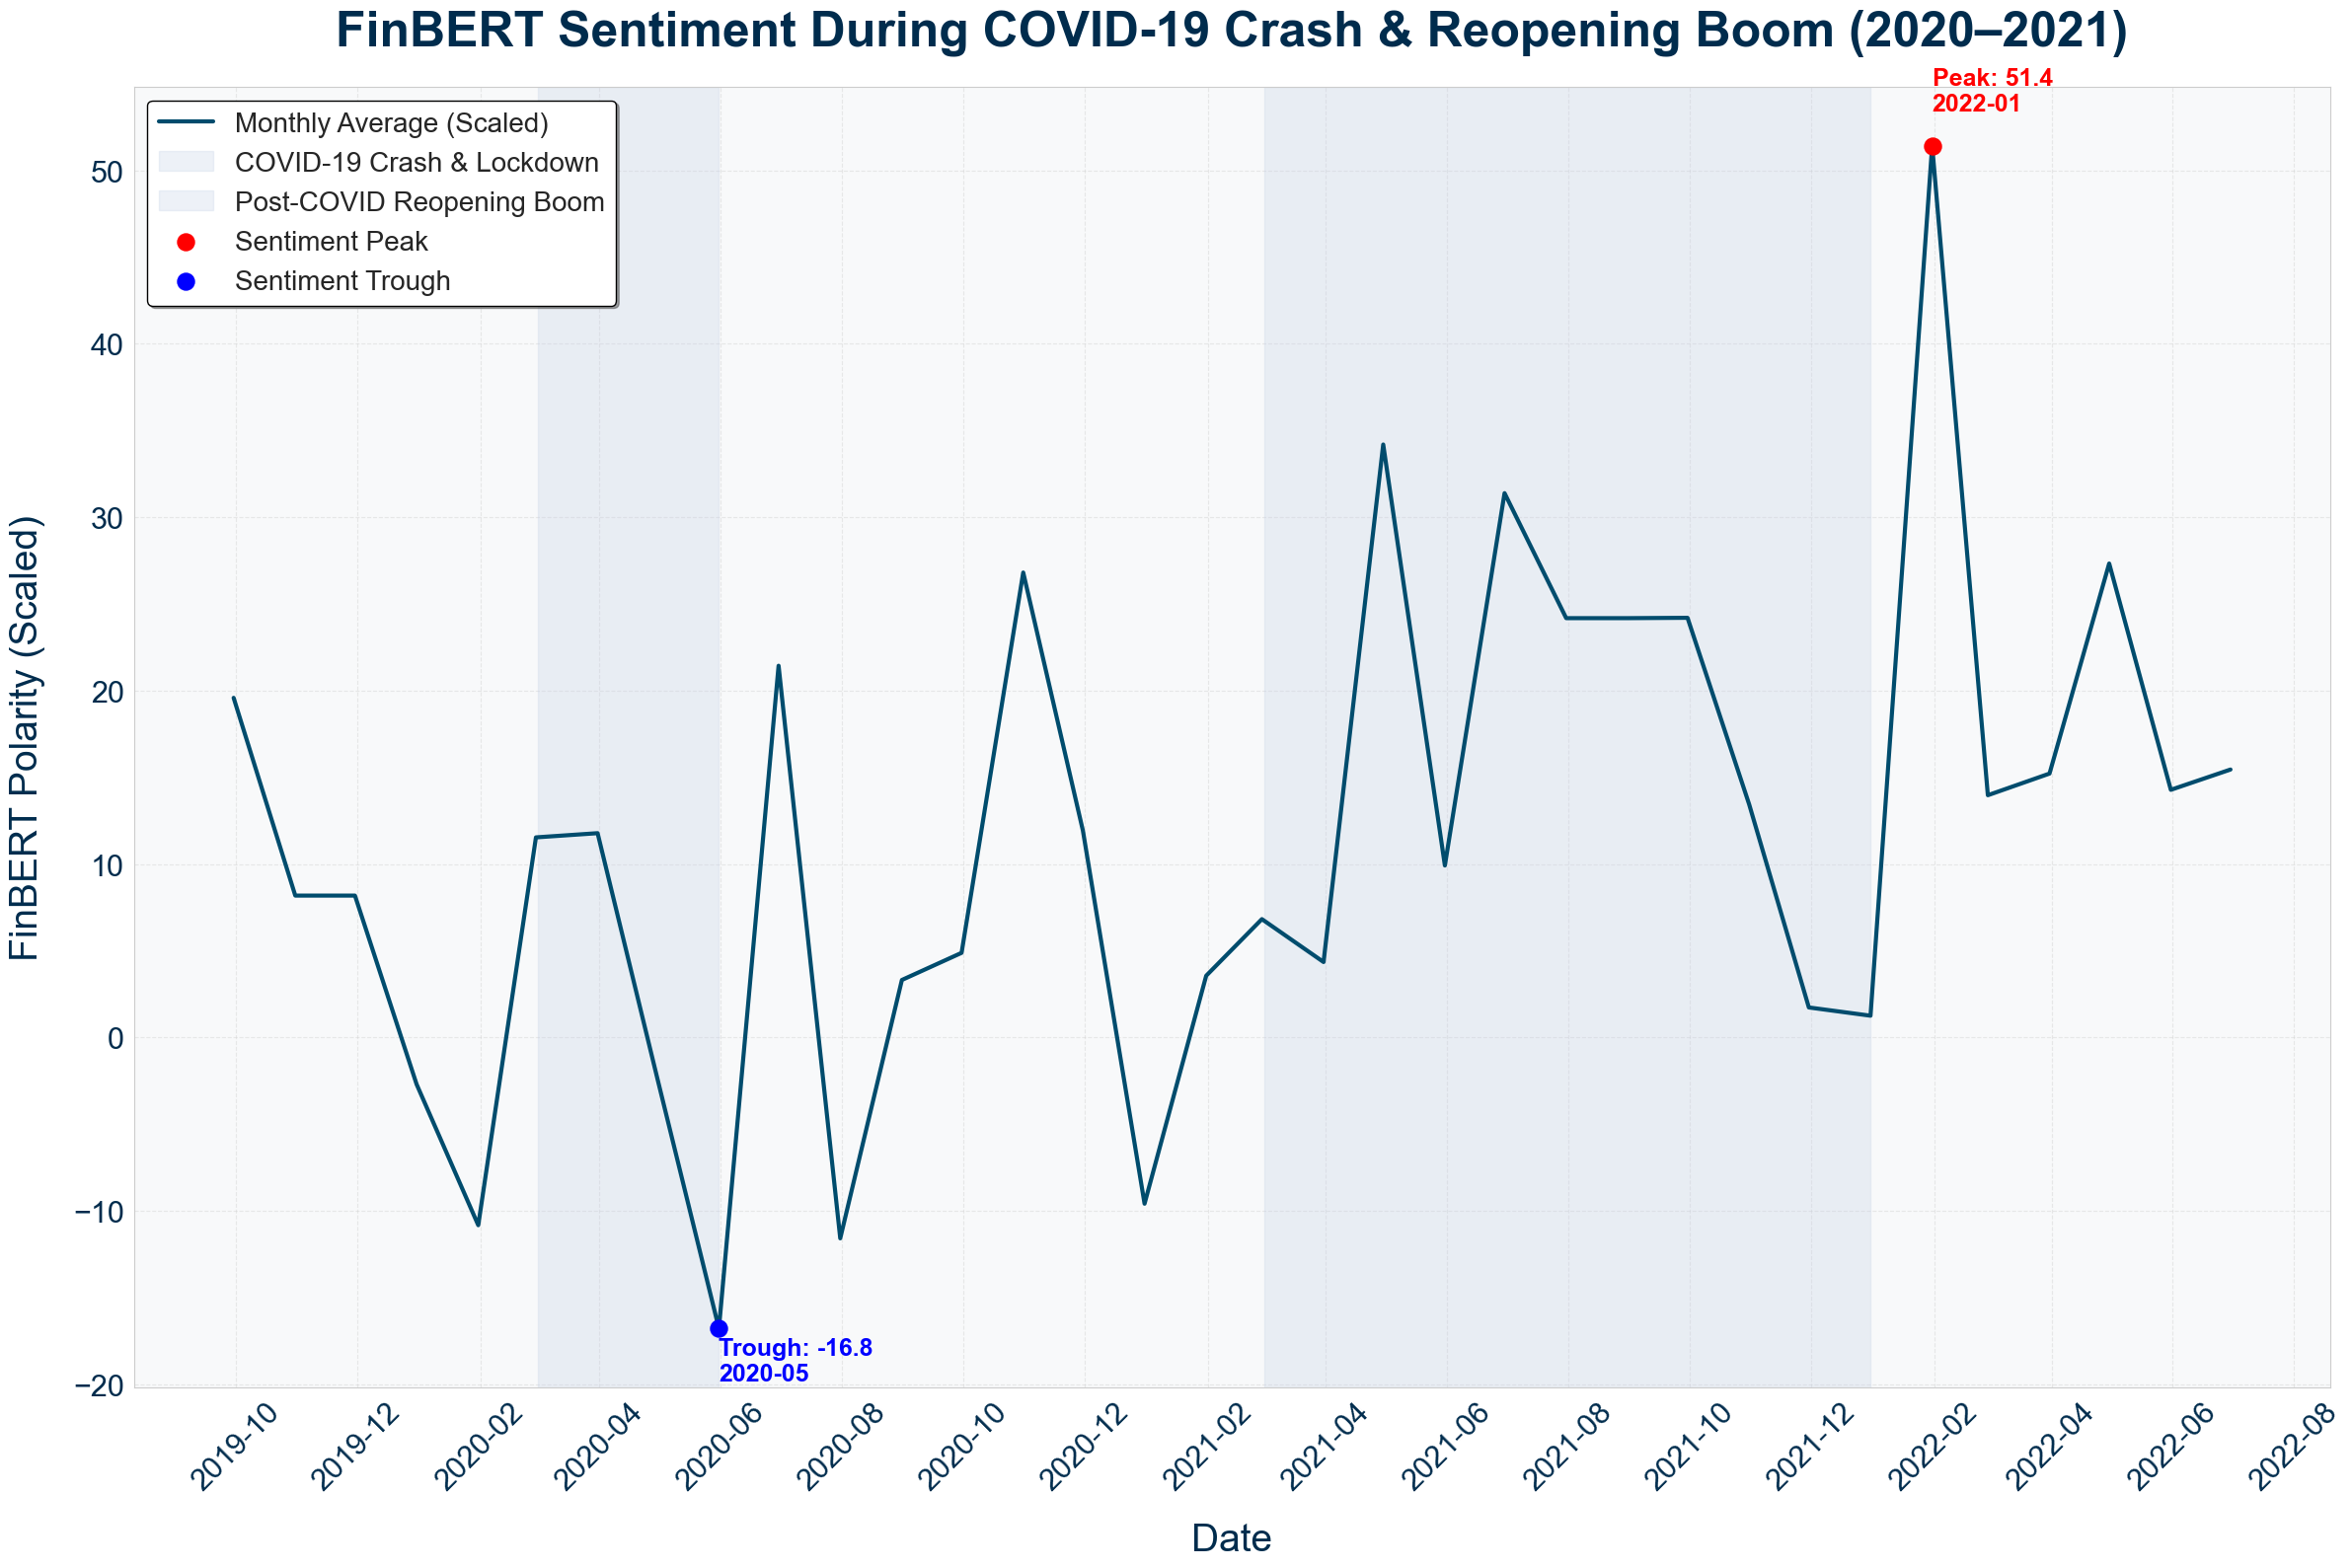

In [112]:
# Ensure datetime format
finbert_sentiment = finbert_sentiment.copy()
finbert_sentiment['Date'] = pd.to_datetime(finbert_sentiment['Date'])

# Define event-specific periods
event_name = "COVID-19 Crash & Reopening Boom"
events = [
    {"Event": "COVID-19 Crash & Lockdown", "Start": "2020-03-01", "End": "2020-05-31"},
    {"Event": "Post-COVID Reopening Boom", "Start": "2021-03-01", "End": "2021-12-31"}
]

# Define overall plotting window
overall_start = pd.to_datetime("2020-03-01") - pd.DateOffset(months=6)
overall_end = pd.to_datetime("2021-12-31") + pd.DateOffset(months=6)
event_data = finbert_sentiment[(finbert_sentiment['Date'] >= overall_start) & (finbert_sentiment['Date'] <= overall_end)]

# Resample monthly and process sentiment
monthly_event_data = event_data.set_index('Date').resample('M').mean().reset_index()
monthly_event_data['polarity_score_finbert'] = monthly_event_data['polarity_score_finbert'].ffill()
monthly_event_data['polarity_scaled'] = monthly_event_data['polarity_score_finbert'] * 100

# Detect sentiment peak/trough
peak_idx = monthly_event_data['polarity_scaled'].idxmax()
trough_idx = monthly_event_data['polarity_scaled'].idxmin()
peak_date = monthly_event_data.loc[peak_idx, 'Date']
peak_value = monthly_event_data.loc[peak_idx, 'polarity_scaled']
trough_date = monthly_event_data.loc[trough_idx, 'Date']
trough_value = monthly_event_data.loc[trough_idx, 'polarity_scaled']

# Plot setup
plt.figure(figsize=(24, 16))
sns.set_style("whitegrid")

# Plot sentiment line
plt.plot(monthly_event_data['Date'], monthly_event_data['polarity_scaled'],
         color='#004c6d', linewidth=3, label='Monthly Average (Scaled)')

# Highlight event periods
added_labels = set()
for event in events:
    start = pd.to_datetime(event["Start"])
    end = pd.to_datetime(event["End"])
    label = event["Event"] if event["Event"] not in added_labels else None
    plt.axvspan(start, end, color='#c6d2e6', alpha=0.3, label=label)
    added_labels.add(event["Event"])

# Annotate sentiment extremes
plt.scatter([peak_date], [peak_value], color='red', s=150, zorder=5, label='Sentiment Peak')
plt.scatter([trough_date], [trough_value], color='blue', s=150, zorder=5, label='Sentiment Trough')
plt.text(peak_date, peak_value + 2, f'Peak: {peak_value:.1f}\n{peak_date:%Y-%m}', color='red', fontsize=18, weight='bold')
plt.text(trough_date, trough_value - 3, f'Trough: {trough_value:.1f}\n{trough_date:%Y-%m}', color='blue', fontsize=18, weight='bold')

# Axis titles and labels
plt.title("FinBERT Sentiment During COVID-19 Crash & Reopening Boom (2020–2021)", fontsize=36, pad=30, weight='bold', color='#002c4d')
plt.xlabel("Date", fontsize=28, labelpad=20, color='#002c4d')
plt.ylabel("FinBERT Polarity (Scaled)", fontsize=28, labelpad=20, color='#002c4d')

# Format axes
plt.xticks(rotation=45, fontsize=22, color='#002c4d')
plt.yticks(fontsize=22, color='#002c4d')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().set_facecolor('#f8f9fa')
plt.grid(True, linestyle='--', alpha=0.4)

# Add styled legend
plt.legend(loc='upper left', fontsize=20, frameon=True, shadow=True,
           facecolor='white', edgecolor='black', fancybox=True)

# Final layout and show
plt.tight_layout()
# plt.savefig("covid_sentiment_final.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_18228\3865358819.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = monthly.set_index("Date").resample("M").mean().reset_index()


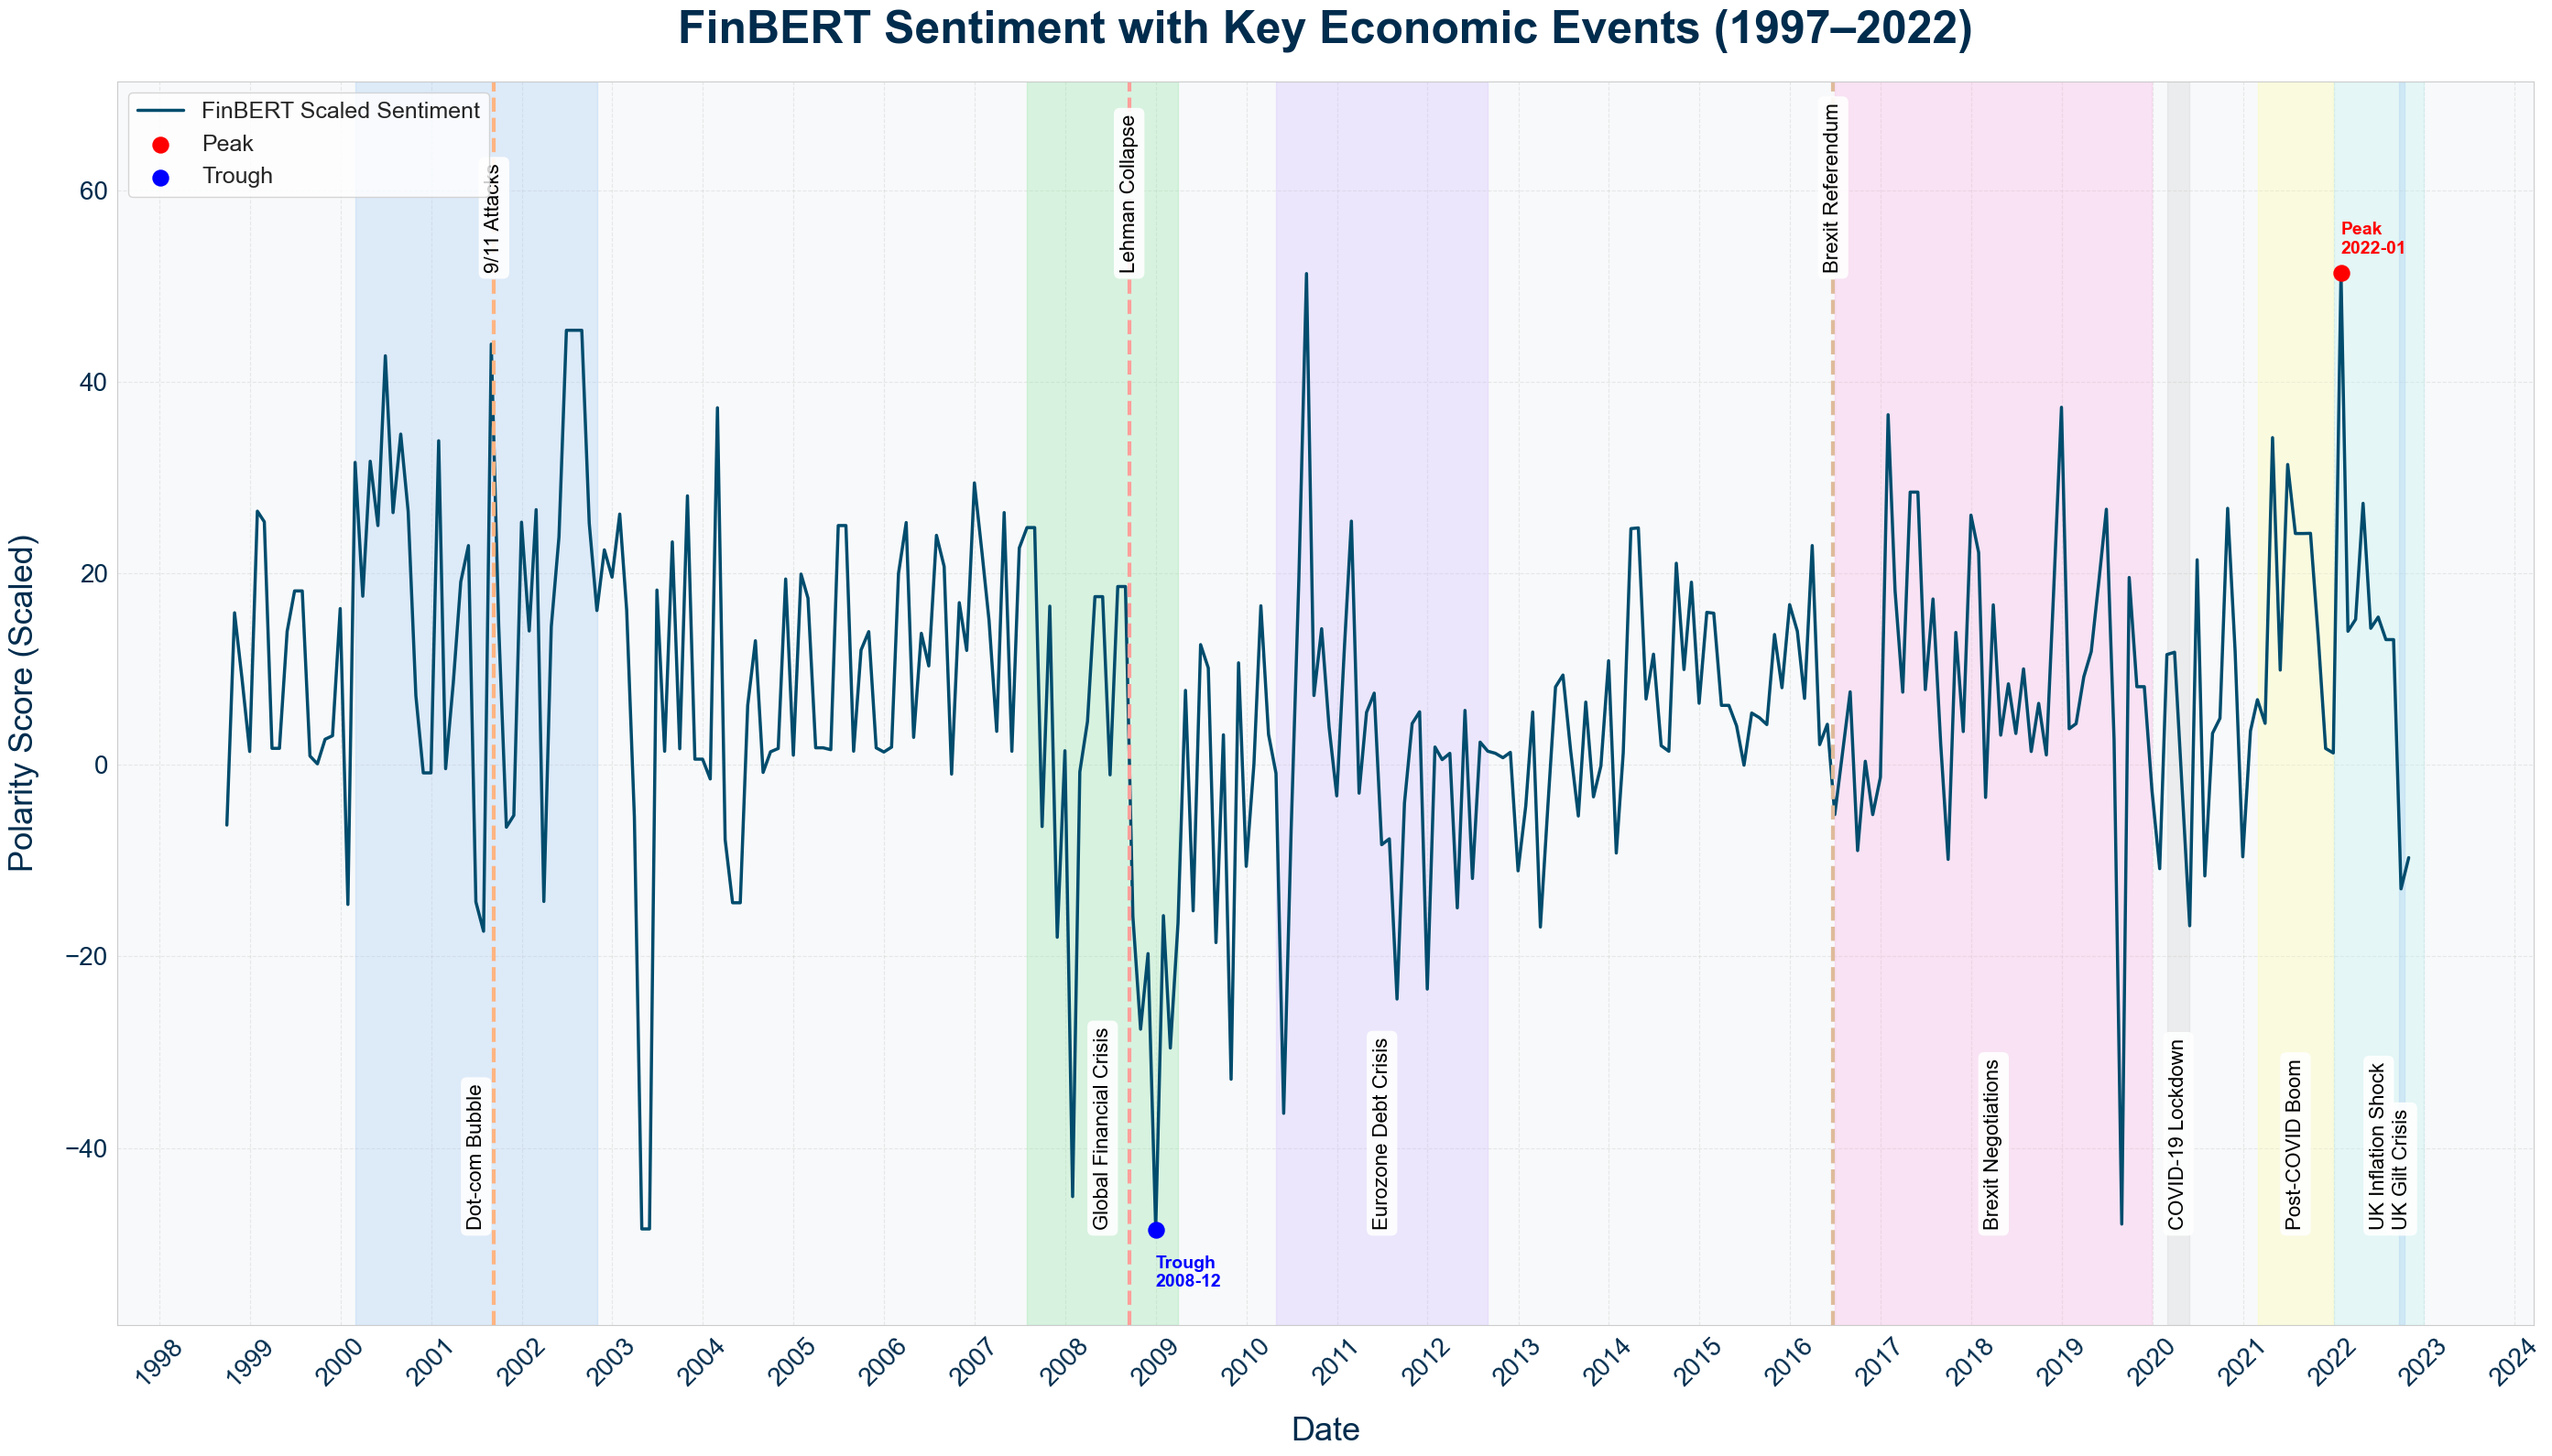

In [132]:
# Define full timeframe events
events = [
    {"Event": "Dot-com Bubble", "Start": "2000-03-01", "End": "2002-10-31"},
    {"Event": "9/11 Attacks", "Start": "2001-09-11", "End": "2001-09-11"},
    {"Event": "Global Financial Crisis", "Start": "2007-08-01", "End": "2009-03-31"},
    {"Event": "Lehman Collapse", "Start": "2008-09-15", "End": "2008-09-15"},
    {"Event": "Eurozone Debt Crisis", "Start": "2010-05-01", "End": "2012-08-31"},
    {"Event": "Brexit Referendum", "Start": "2016-06-23", "End": "2016-06-23"},
    {"Event": "Brexit Negotiations", "Start": "2016-07-01", "End": "2019-12-31"},
    {"Event": "COVID-19 Lockdown", "Start": "2020-03-01", "End": "2020-05-31"},
    {"Event": "Post-COVID Boom", "Start": "2021-03-01", "End": "2021-12-31"},
    {"Event": "UK Inflation Shock", "Start": "2022-01-01", "End": "2022-12-31"},
    {"Event": "UK Gilt Crisis", "Start": "2022-09-23", "End": "2022-10-14"}
]

# Filter and resample sentiment
monthly = finbert_sentiment[(finbert_sentiment['Date'] >= "1997-01-01") & (finbert_sentiment['Date'] <= "2022-12-31")]
monthly = monthly.set_index("Date").resample("M").mean().reset_index()
monthly['polarity_score_finbert'] = monthly['polarity_score_finbert'].ffill()
monthly['polarity_scaled'] = monthly['polarity_score_finbert'] * 100

# Detect peaks and troughs
peak = monthly.loc[monthly['polarity_scaled'].idxmax()]
trough = monthly.loc[monthly['polarity_scaled'].idxmin()]

# Plot
plt.figure(figsize=(28, 16))
sns.set_style("whitegrid")
plt.plot(monthly['Date'], monthly['polarity_scaled'], color='#004c6d', linewidth=2.5, label='FinBERT Scaled Sentiment')

# Highlight events with improved text
colors = sns.color_palette("pastel", len(events))  # softer contrast
y_max = monthly['polarity_scaled'].max()

for i, event in enumerate(events):
    start = pd.to_datetime(event["Start"])
    end = pd.to_datetime(event["End"])
    mid = start + (end - start) / 2
    color = colors[i]

    # Single day or range event
    if start == end:
        plt.axvline(start, color=color, linestyle='--', linewidth=3)
        plt.text(start, monthly['polarity_scaled'].max(), event['Event'], rotation=90,
                 color='black', fontsize=16, ha='center', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.9))
    else:
        plt.axvspan(start, end, color=color, alpha=0.3)
        plt.text(mid, monthly['polarity_scaled'].min(), event['Event'], rotation=90,
                 color='black', fontsize=16, ha='center', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.9))

# Annotate peak/trough
plt.scatter(peak['Date'], peak['polarity_scaled'], color='red', s=150, zorder=5, label='Peak')
plt.scatter(trough['Date'], trough['polarity_scaled'], color='blue', s=150, zorder=5, label='Trough')
plt.text(peak['Date'], peak['polarity_scaled'] + 2, f'Peak\n{peak["Date"]:%Y-%m}', color='red', fontsize=14, weight='bold')
plt.text(trough['Date'], trough['polarity_scaled'] - 6, f'Trough\n{trough["Date"]:%Y-%m}', color='blue', fontsize=14, weight='bold')

# Labels & formatting
plt.title("FinBERT Sentiment with Key Economic Events (1997–2022)", fontsize=36, pad=30, weight='bold', color='#002c4d')
plt.xlabel("Date", fontsize=26, labelpad=20, color='#002c4d')
plt.ylabel("Polarity Score (Scaled)", fontsize=26, labelpad=20, color='#002c4d')
plt.xticks(rotation=45, fontsize=20, color='#002c4d')
plt.yticks(fontsize=20, color='#002c4d')
plt.ylim(bottom=monthly['polarity_scaled'].min() - 10, top=y_max + 20)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.gca().set_facecolor('#f8f9fa')
plt.grid(True, linestyle='--', alpha=0.4)

# Legend
plt.legend(loc='upper left', fontsize=18, frameon=True, facecolor='white')

# Final layout
plt.tight_layout()
plt.show()

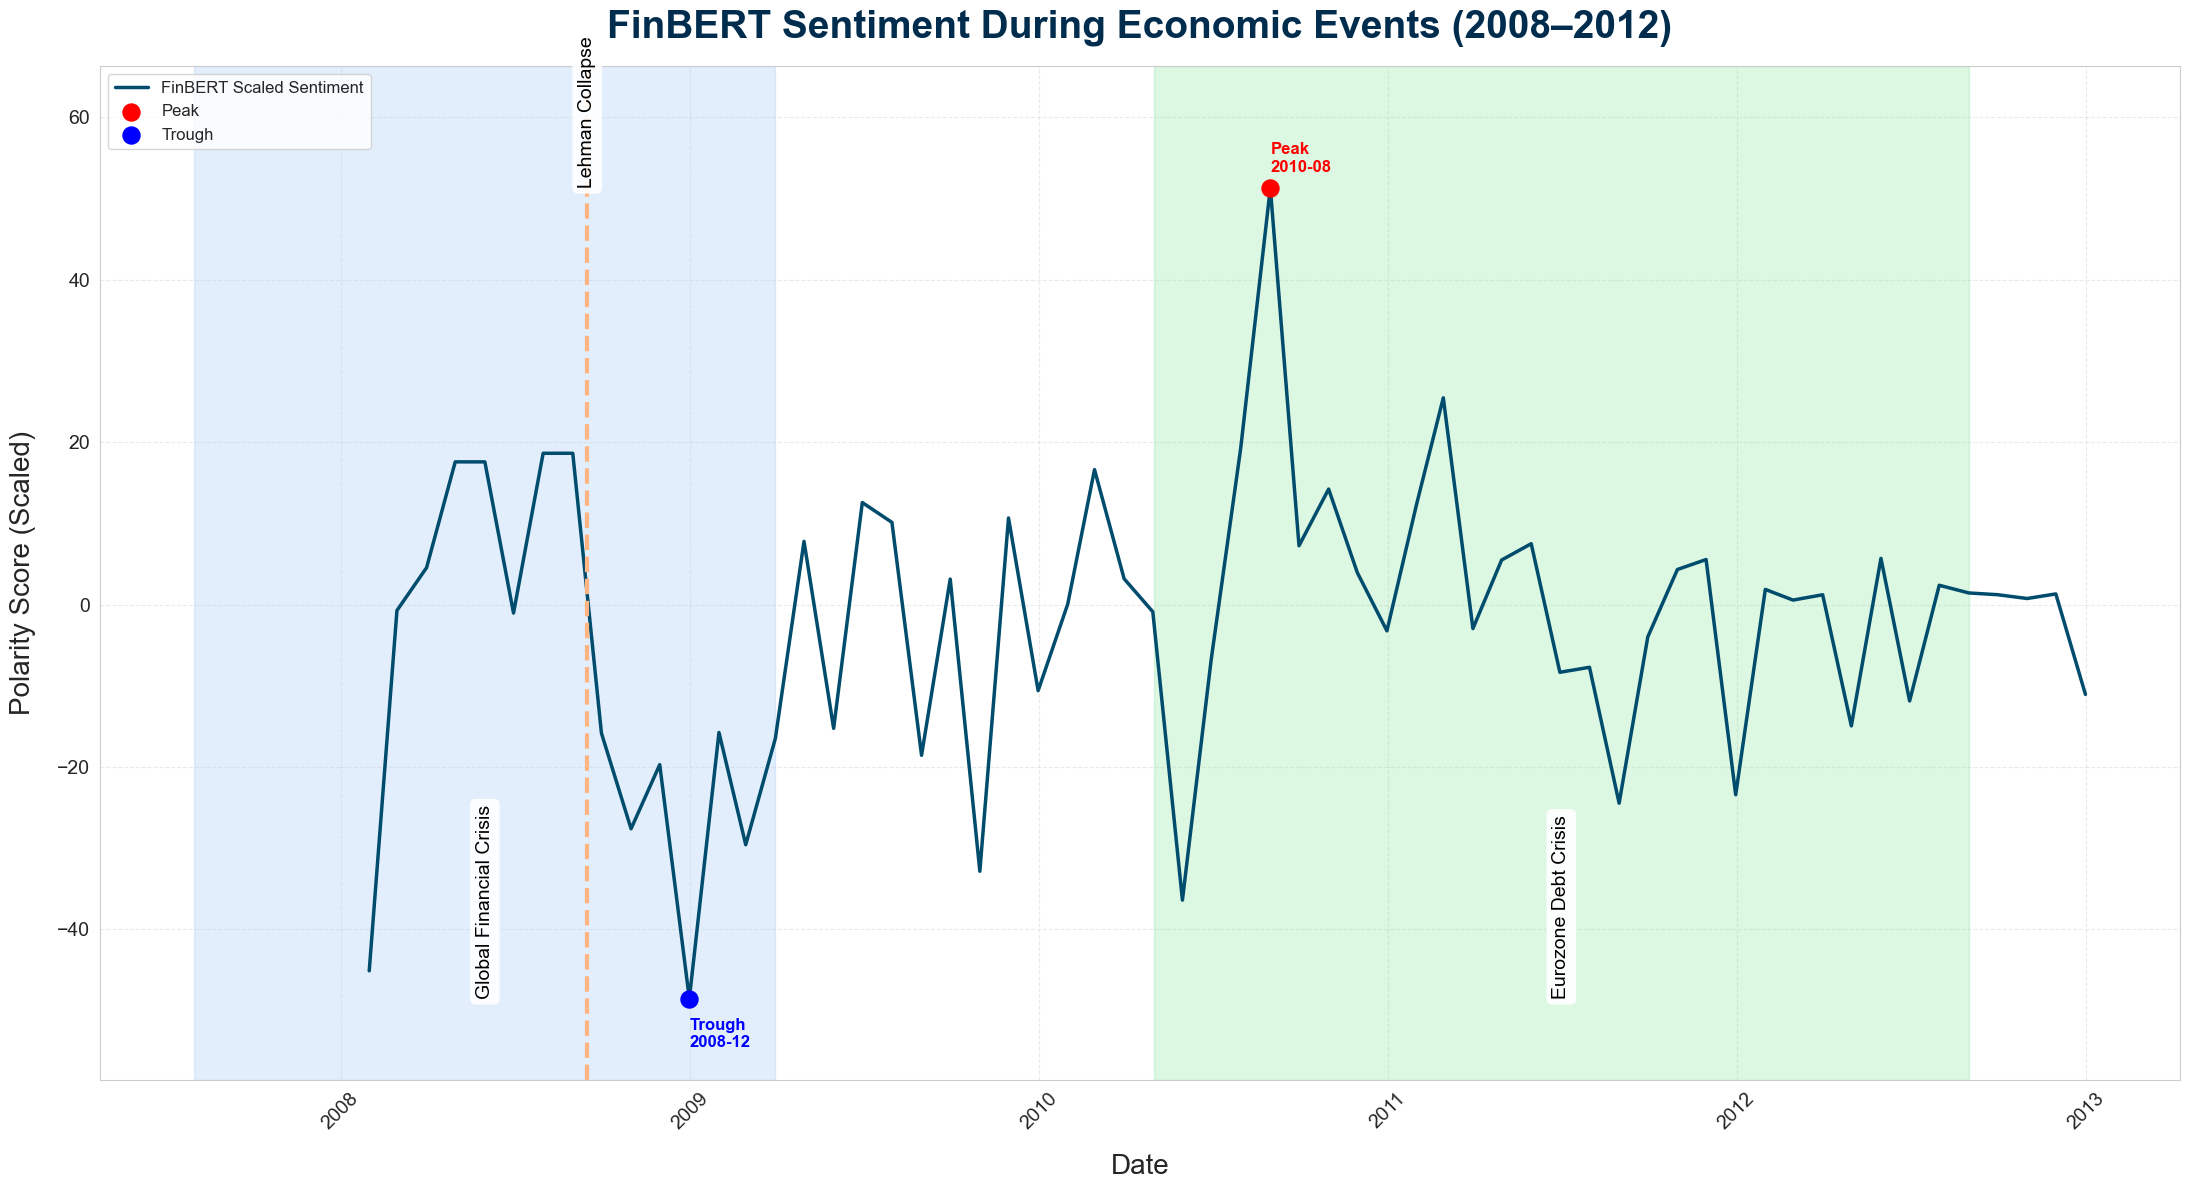

In [9]:
# Define 2008–2012 events only
events_2008_2012 = [
    {"Event": "Global Financial Crisis", "Start": "2007-08-01", "End": "2009-03-31"},
    {"Event": "Lehman Collapse", "Start": "2008-09-15", "End": "2008-09-15"},
    {"Event": "Eurozone Debt Crisis", "Start": "2010-05-01", "End": "2012-08-31"}
]

# Ensure 'Date' column is datetime
finbert_sentiment['Date'] = pd.to_datetime(finbert_sentiment['Date'])

# Filter and resample sentiment data for 2008–2012
monthly = finbert_sentiment[
    (finbert_sentiment['Date'] >= "2008-01-01") & 
    (finbert_sentiment['Date'] <= "2012-12-31")
].copy()

monthly = monthly.set_index("Date").resample("ME").mean().reset_index()
monthly['polarity_score_finbert'] = monthly['polarity_score_finbert'].ffill()
monthly['polarity_scaled'] = monthly['polarity_score_finbert'] * 100

# Detect peak and trough
peak = monthly.loc[monthly['polarity_scaled'].idxmax()]
trough = monthly.loc[monthly['polarity_scaled'].idxmin()]

# Plot
plt.figure(figsize=(22, 12))
sns.set_style("whitegrid")
plt.plot(monthly['Date'], monthly['polarity_scaled'], color='#004c6d', linewidth=2.5, label='FinBERT Scaled Sentiment')

# Highlight 2008–2012 events
colors = sns.color_palette("pastel", len(events_2008_2012))
y_max = monthly['polarity_scaled'].max()

for i, event in enumerate(events_2008_2012):
    start = pd.to_datetime(event["Start"])
    end = pd.to_datetime(event["End"])
    mid = start + (end - start) / 2
    color = colors[i]

    if start == end:
        plt.axvline(start, color=color, linestyle='--', linewidth=3)
        plt.text(start, y_max, event['Event'], rotation=90, fontsize=14, color='black',
                 ha='center', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.9))
    else:
        plt.axvspan(start, end, color=color, alpha=0.3)
        plt.text(mid, monthly['polarity_scaled'].min(), event['Event'], rotation=90,
                 fontsize=14, color='black', ha='center', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.9))

# Peak and trough annotations
plt.scatter(peak['Date'], peak['polarity_scaled'], color='red', s=150, zorder=5, label='Peak')
plt.scatter(trough['Date'], trough['polarity_scaled'], color='blue', s=150, zorder=5, label='Trough')
plt.text(peak['Date'], peak['polarity_scaled'] + 2, f'Peak\n{peak["Date"]:%Y-%m}', color='red', fontsize=12, weight='bold')
plt.text(trough['Date'], trough['polarity_scaled'] - 6, f'Trough\n{trough["Date"]:%Y-%m}', color='blue', fontsize=12, weight='bold')

# Title and axes
plt.title("FinBERT Sentiment During Economic Events (2008–2012)", fontsize=28, pad=20, weight='bold', color='#002c4d')
plt.xlabel("Date", fontsize=20, labelpad=15)
plt.ylabel("Polarity Score (Scaled)", fontsize=20, labelpad=15)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(bottom=monthly['polarity_scaled'].min() - 10, top=y_max + 15)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(loc='upper left', fontsize=12, frameon=True)

plt.tight_layout()
plt.show()

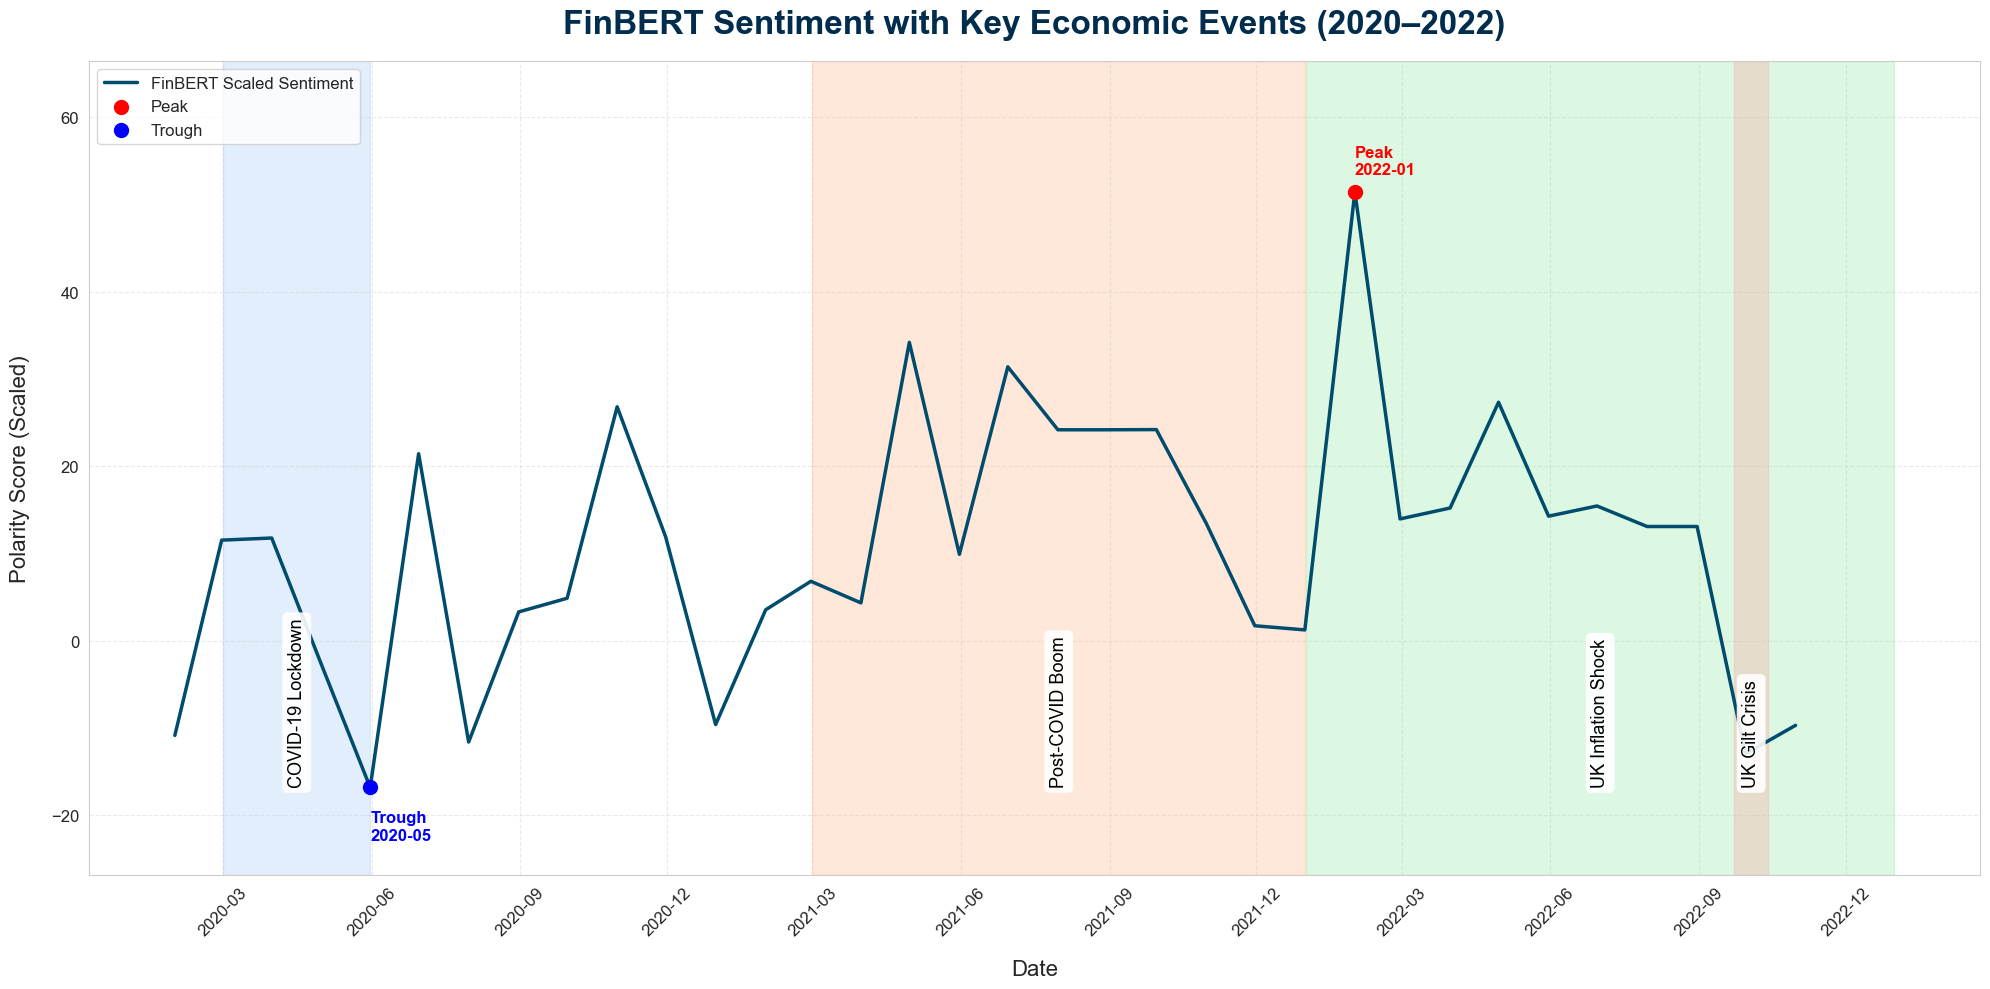

In [11]:
# Define relevant events for 2020–2022
events_2020_2022 = [
    {"Event": "COVID-19 Lockdown", "Start": "2020-03-01", "End": "2020-05-31"},
    {"Event": "Post-COVID Boom", "Start": "2021-03-01", "End": "2021-12-31"},
    {"Event": "UK Inflation Shock", "Start": "2022-01-01", "End": "2022-12-31"},
    {"Event": "UK Gilt Crisis", "Start": "2022-09-23", "End": "2022-10-14"}
]

# Ensure Date column is datetime
finbert_sentiment['Date'] = pd.to_datetime(finbert_sentiment['Date'])

# Filter and resample data for 2020–2022
monthly = finbert_sentiment[
    (finbert_sentiment['Date'] >= "2020-01-01") & 
    (finbert_sentiment['Date'] <= "2022-12-31")
].copy()

monthly = monthly.set_index("Date").resample("ME").mean(numeric_only=True).reset_index()
monthly['polarity_score_finbert'] = monthly['polarity_score_finbert'].ffill()
monthly['polarity_scaled'] = monthly['polarity_score_finbert'] * 100

# Detect peak and trough
peak = monthly.loc[monthly['polarity_scaled'].idxmax()]
trough = monthly.loc[monthly['polarity_scaled'].idxmin()]

# Plot
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")
plt.plot(monthly['Date'], monthly['polarity_scaled'], color='#004c6d', linewidth=2.5, label='FinBERT Scaled Sentiment')

# Highlight events
colors = sns.color_palette("pastel", len(events_2020_2022))
y_max = monthly['polarity_scaled'].max()

for i, event in enumerate(events_2020_2022):
    start = pd.to_datetime(event["Start"])
    end = pd.to_datetime(event["End"])
    mid = start + (end - start) / 2
    color = colors[i]

    if start == end:
        plt.axvline(start, color=color, linestyle='--', linewidth=3)
        plt.text(start, y_max, event['Event'], rotation=90, fontsize=13, color='black',
                 ha='center', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.9))
    else:
        plt.axvspan(start, end, color=color, alpha=0.3)
        plt.text(mid, monthly['polarity_scaled'].min(), event['Event'], rotation=90, fontsize=13,
                 color='black', ha='center', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.9))

# Annotate peak and trough
plt.scatter(peak['Date'], peak['polarity_scaled'], color='red', s=100, zorder=5, label='Peak')
plt.scatter(trough['Date'], trough['polarity_scaled'], color='blue', s=100, zorder=5, label='Trough')
plt.text(peak['Date'], peak['polarity_scaled'] + 2, f'Peak\n{peak["Date"]:%Y-%m}', color='red', fontsize=12, weight='bold')
plt.text(trough['Date'], trough['polarity_scaled'] - 6, f'Trough\n{trough["Date"]:%Y-%m}', color='blue', fontsize=12, weight='bold')

# Labels and formatting
plt.title("FinBERT Sentiment with Key Economic Events (2020–2022)", fontsize=24, pad=20, weight='bold', color='#002c4d')
plt.xlabel("Date", fontsize=16, labelpad=15)
plt.ylabel("Polarity Score (Scaled)", fontsize=16, labelpad=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(bottom=monthly['polarity_scaled'].min() - 10, top=y_max + 15)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(loc='upper left', fontsize=12, frameon=True)

plt.tight_layout()
plt.show()

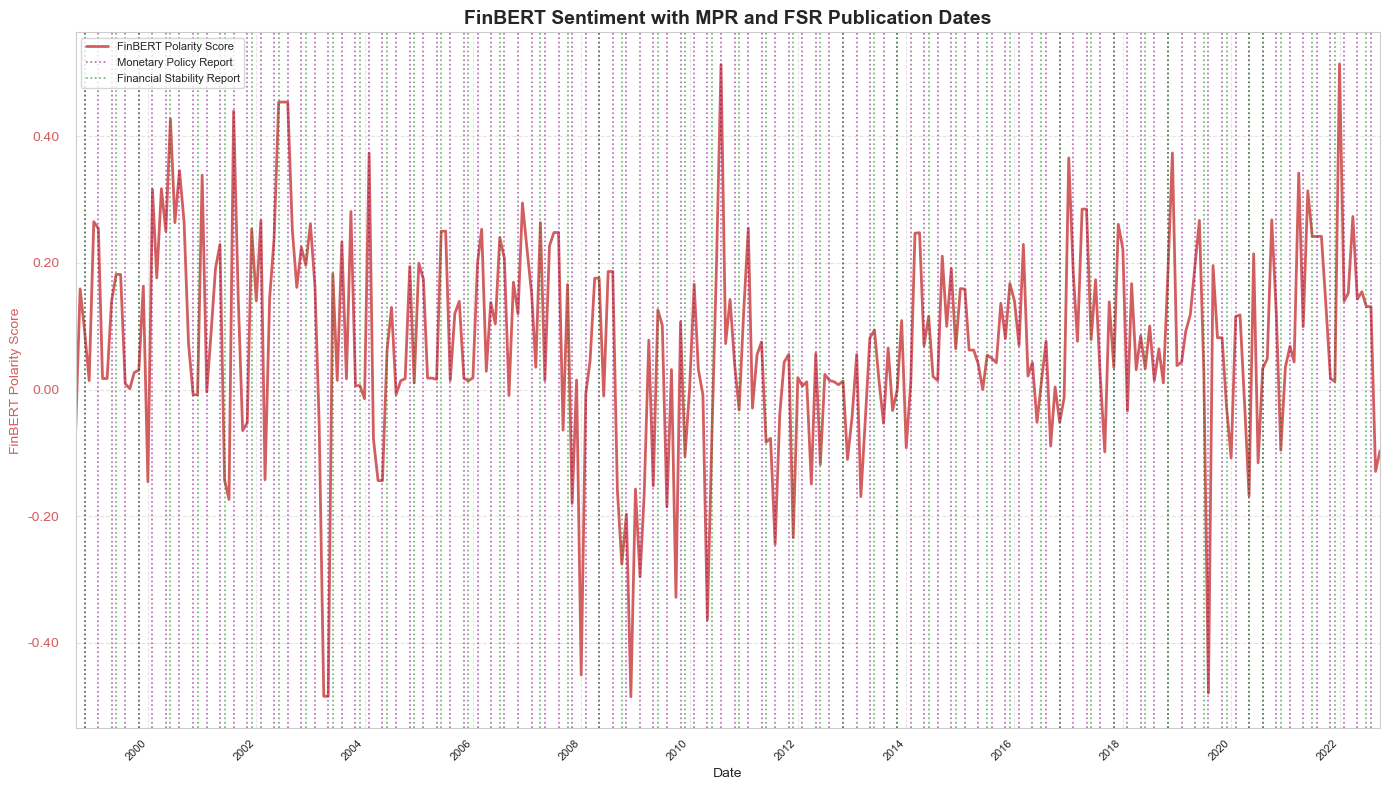

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# Convert date to datetime
finbert_sentiment['Date'] = pd.to_datetime(finbert_sentiment['Date'], errors='coerce')

# Filter data from 1998-09-01 onwards
start_date = pd.to_datetime('1998-09-01')
df_plot2 = finbert_sentiment[finbert_sentiment['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['polarity_score_finbert'])

# Resample to monthly average using month start, fill missing months
df_plot2 = df_plot2.set_index('Date').resample('MS').mean().ffill().reset_index()

# Load MPR and FSR dates
mpr_dates = pd.read_csv(
    'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv',
    parse_dates=['date']
)
fsr_dates = pd.read_csv(
    'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv',
    parse_dates=['date']
)

# Plotting setup
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))
color_sentiment = '#d35e60'

# Plot FinBERT sentiment
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# Add vertical lines (deduplicated labels)
mpr_label_added = False
fsr_label_added = False
for date in mpr_dates['date']:
    ax.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.6,
               label='Monetary Policy Report' if not mpr_label_added else "")
    mpr_label_added = True

for date in fsr_dates['date']:
    ax.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.6,
               label='Financial Stability Report' if not fsr_label_added else "")
    fsr_label_added = True

# Title and axis formatting
plt.title('FinBERT Sentiment with MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Legend and final layout
ax.legend(loc='upper left', fontsize=8)
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xlim(start_date, df_plot2['Date'].max())

plt.tight_layout()
plt.show()
